## Import & Install Statements

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.ticker import StrMethodFormatter, FuncFormatter
from matplotlib.colors import LinearSegmentedColormap, to_rgba

from scipy.stats import gaussian_kde

In [ ]:
customer_df = pd.read_csv('/content/customer_finetuning_data_preprocessed.csv')
amazon_df = pd.read_csv('/content/preprocessed_amazon_df_with_vader_scores_and_score_classification_and_imputations.csv')

In [ ]:
print(customer_df.columns)

Index(['issue_area', 'issue_category', 'issue_sub_category',
       'issue_category_sub_category', 'customer_sentiment', 'product_category',
       'product_sub_category', 'issue_complexity', 'agent_experience_level',
       'agent_experience_level_desc', 'conversation_id',
       'full_conversation_iteratively_updated', 'dialogue_act_label',
       'emotion_label', 'response_sentiment', 'sentiment_label', 'input',
       'response', 'context', 'contextual_feedback', 'key_phrases_input',
       'key_phrases_response', 'keyword_feedback', 'dynamic_feedback',
       'input_for_model', 'output_for_model', 'diverse_output_for_model',
       'cleaned_input', 'cleaned_output', 'adjusted_input_length',
       'adjusted_output_length', 'keyword_match_ratio',
       'keyword_match_ratio_1_10', 'keyword_match_ratio_1_100',
       'input_sentiment', 'input_sentiment_1_10', 'input_sentiment_1_100',
       'cleaned_input_sentiment', 'cleaned_input_sentiment_1_10',
       'cleaned_input_sentiment_1_

## Set a Uniform Style for all the Charts & Tables in the Notebook

In [ ]:
sns.set(style = 'whitegrid')
plt.rcParams['font.family'] = 'serif'

custom_color_palette_pie = ['#F9D549', '#000000', '#FF0000', '#3F3F3F']
custom_color_palette_table = {
    'frustrated': '#FF0000',
    'negative': '#000000',
    'neutral': '#F9D549',
    'positive': '#3F3F3F'
}

custom_color_palette_complexity_sentiment = ['#F9D549', '#000000', '#3F3F3F', '#FF0000']

bold_font = font_manager.FontProperties(weight = 'bold')

## Chart Creation for EDA

In [ ]:

level = customer_df['agent_experience_level'].unique()[0]
sentiment_counts = customer_df[customer_df['agent_experience_level'] == level]['customer_sentiment'].value_counts()

fig, ax = plt.subplots(figsize = (8,8), dpi = 350)
capitalized_labels = sentiment_counts.index.str.capitalize()
wedges, texts = ax.pie(
    sentiment_counts, labels = capitalized_labels,
    startangle = 90,
    colors = custom_color_palette_pie,
    wedgeprops = {'edgecolor': 'black'},
    labeldistance = 1.1
)

for text in texts:
  text.set_fontsize(14)

legend_labels = [f'{label.capitalize()}: {sentiment_counts[label]} ({sentiment_counts[label]/sentiment_counts.sum() * 100:.1f}%)' for label in sentiment_counts.index]

ax.legend(wedges, legend_labels, loc = 'upper left', bbox_to_anchor = (1.05,1), fontsize = 16)

plt.title('Customer Sentiment Distribution: Junior Agents', fontsize = 20)

plt.show()

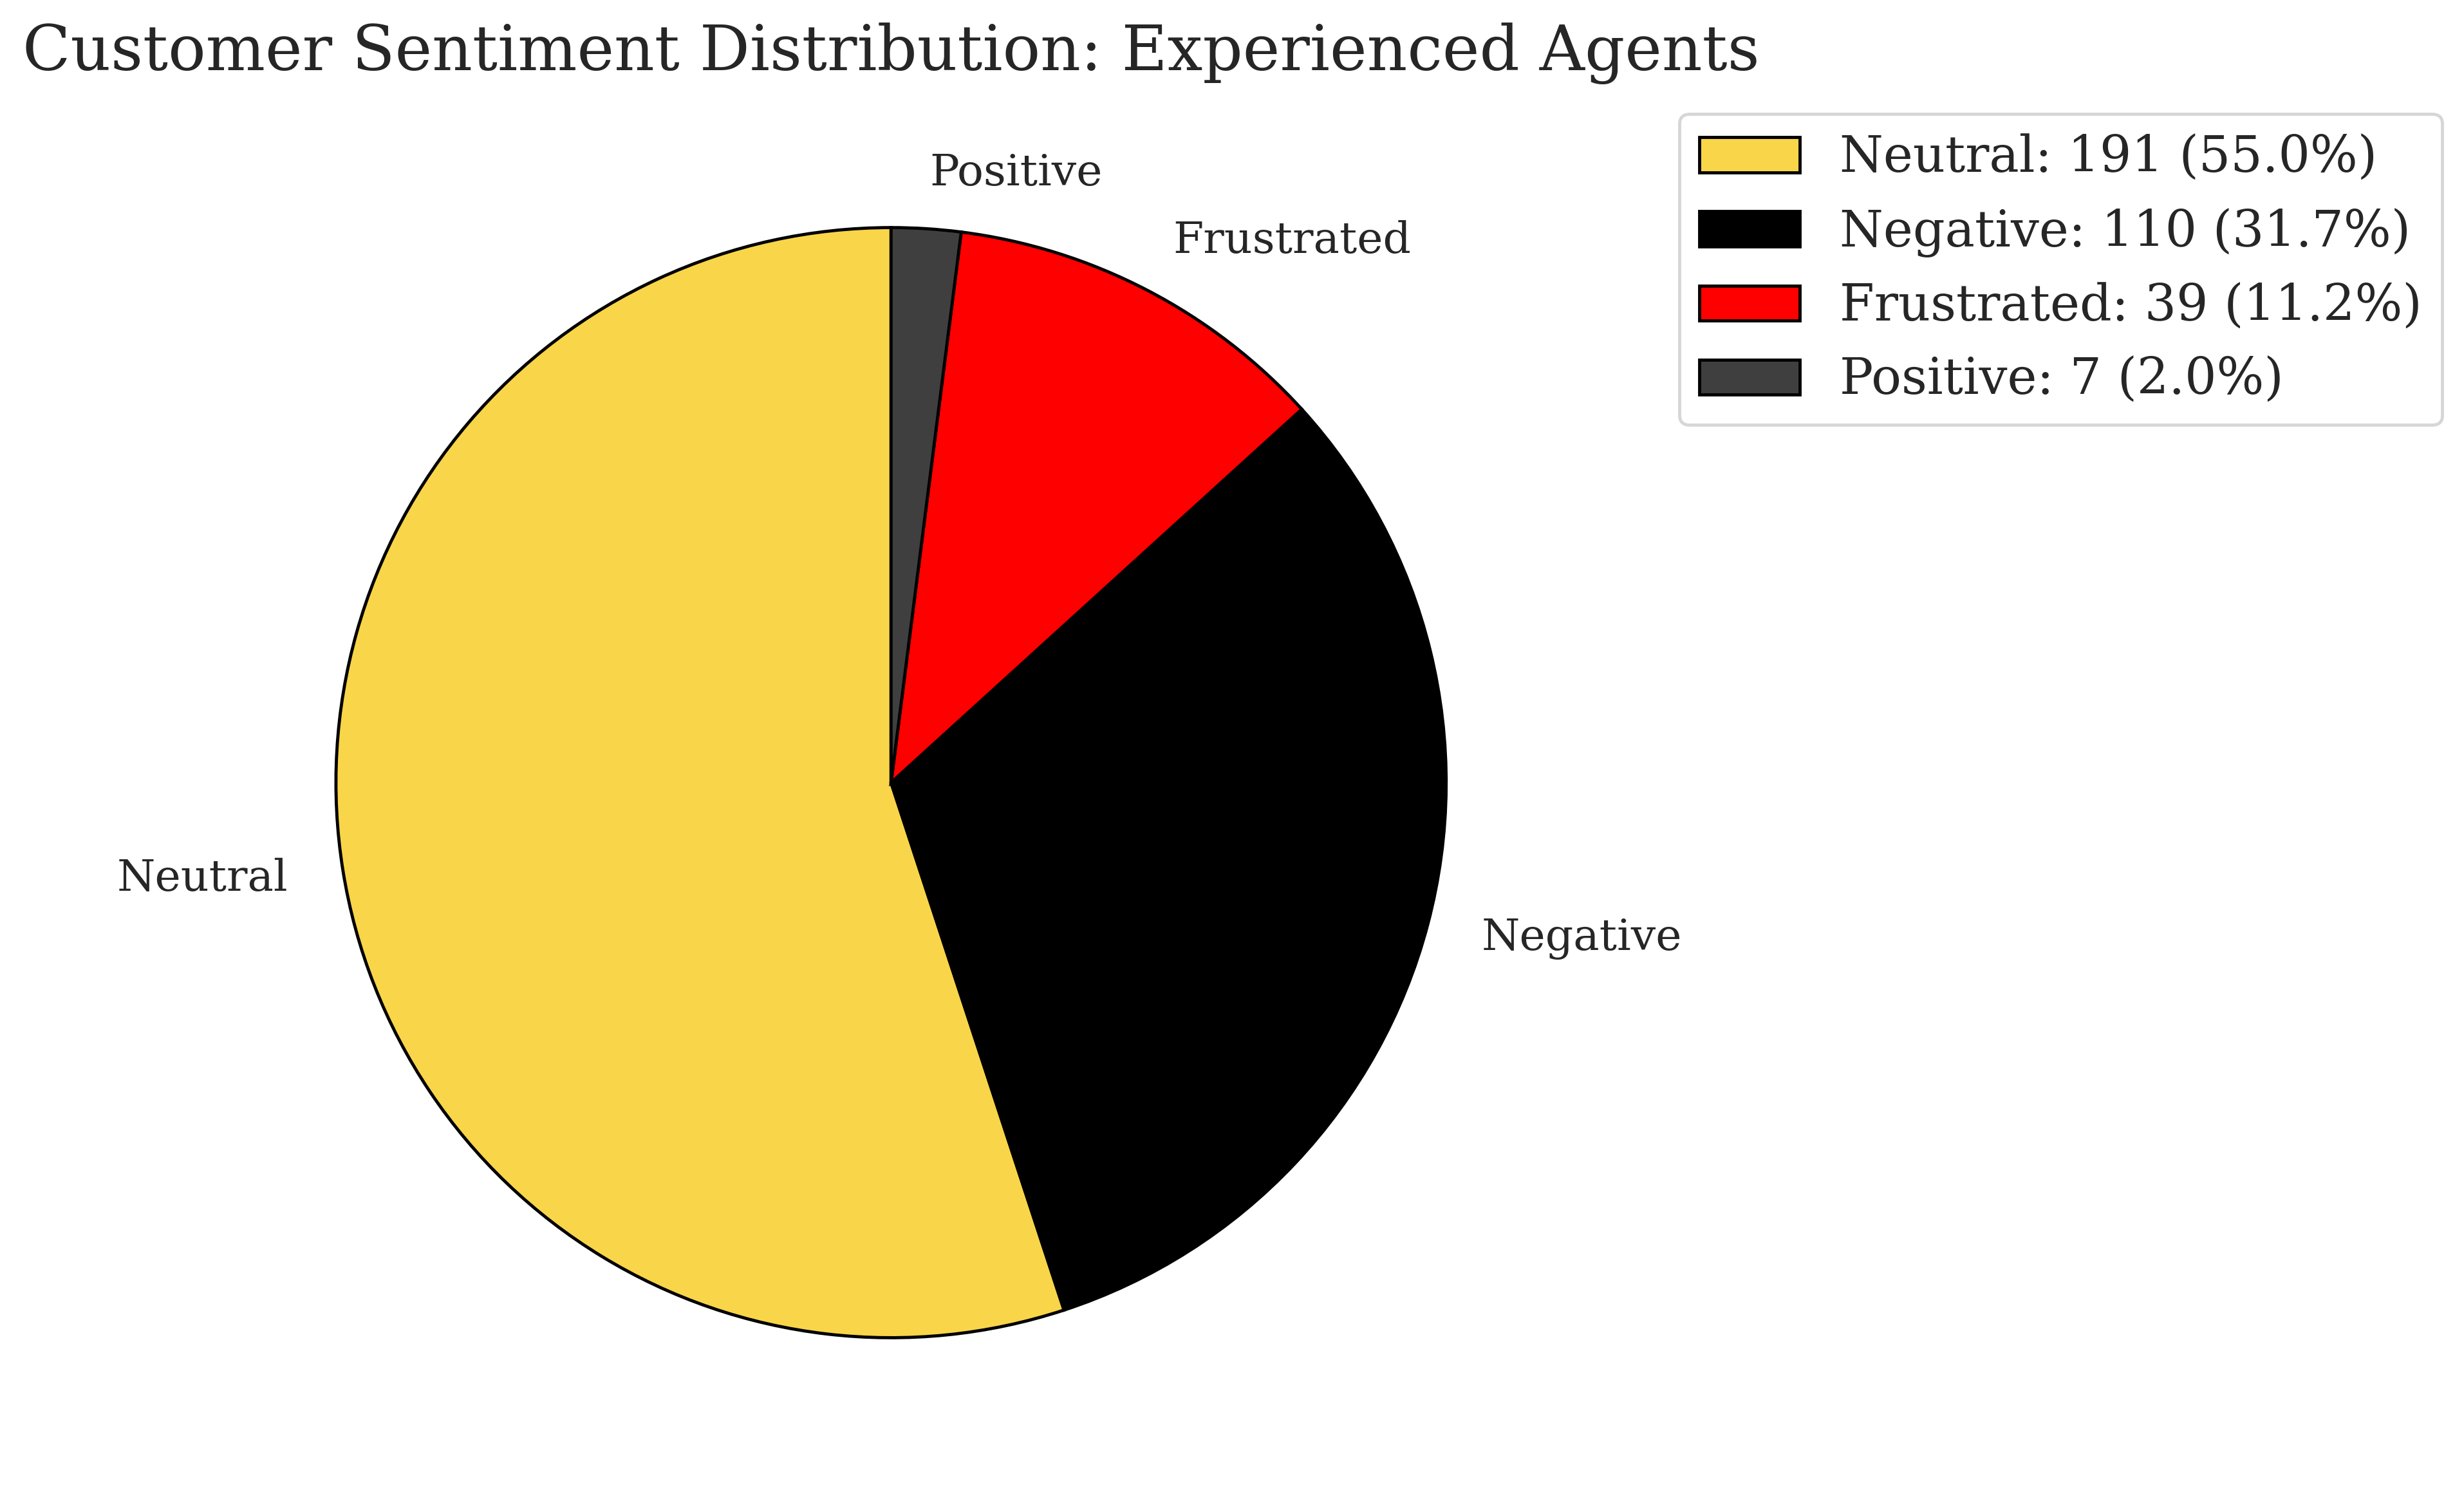

In [ ]:
level = customer_df['agent_experience_level'].unique()[1]
sentiment_counts = customer_df[customer_df['agent_experience_level'] == level]['customer_sentiment'].value_counts()

fig, ax = plt.subplots(figsize = (8,8), dpi = 350)
capitalized_labels = sentiment_counts.index.str.capitalize()
wedges, texts = ax.pie(
    sentiment_counts, labels = capitalized_labels,
    startangle = 90,
    colors = custom_color_palette_pie,
    wedgeprops = {'edgecolor': 'black'},
    labeldistance = 1.1
)

for text in texts:
  text.set_fontsize(14)

legend_labels = [f'{label.capitalize()}: {sentiment_counts[label]} ({sentiment_counts[label]/sentiment_counts.sum() * 100:.1f}%)' for label in sentiment_counts.index]

ax.legend(wedges, legend_labels, loc = 'upper left', bbox_to_anchor = (1.05,1), fontsize = 16)

plt.title('Customer Sentiment Distribution: Experienced Agents', fontsize = 20)

plt.show()

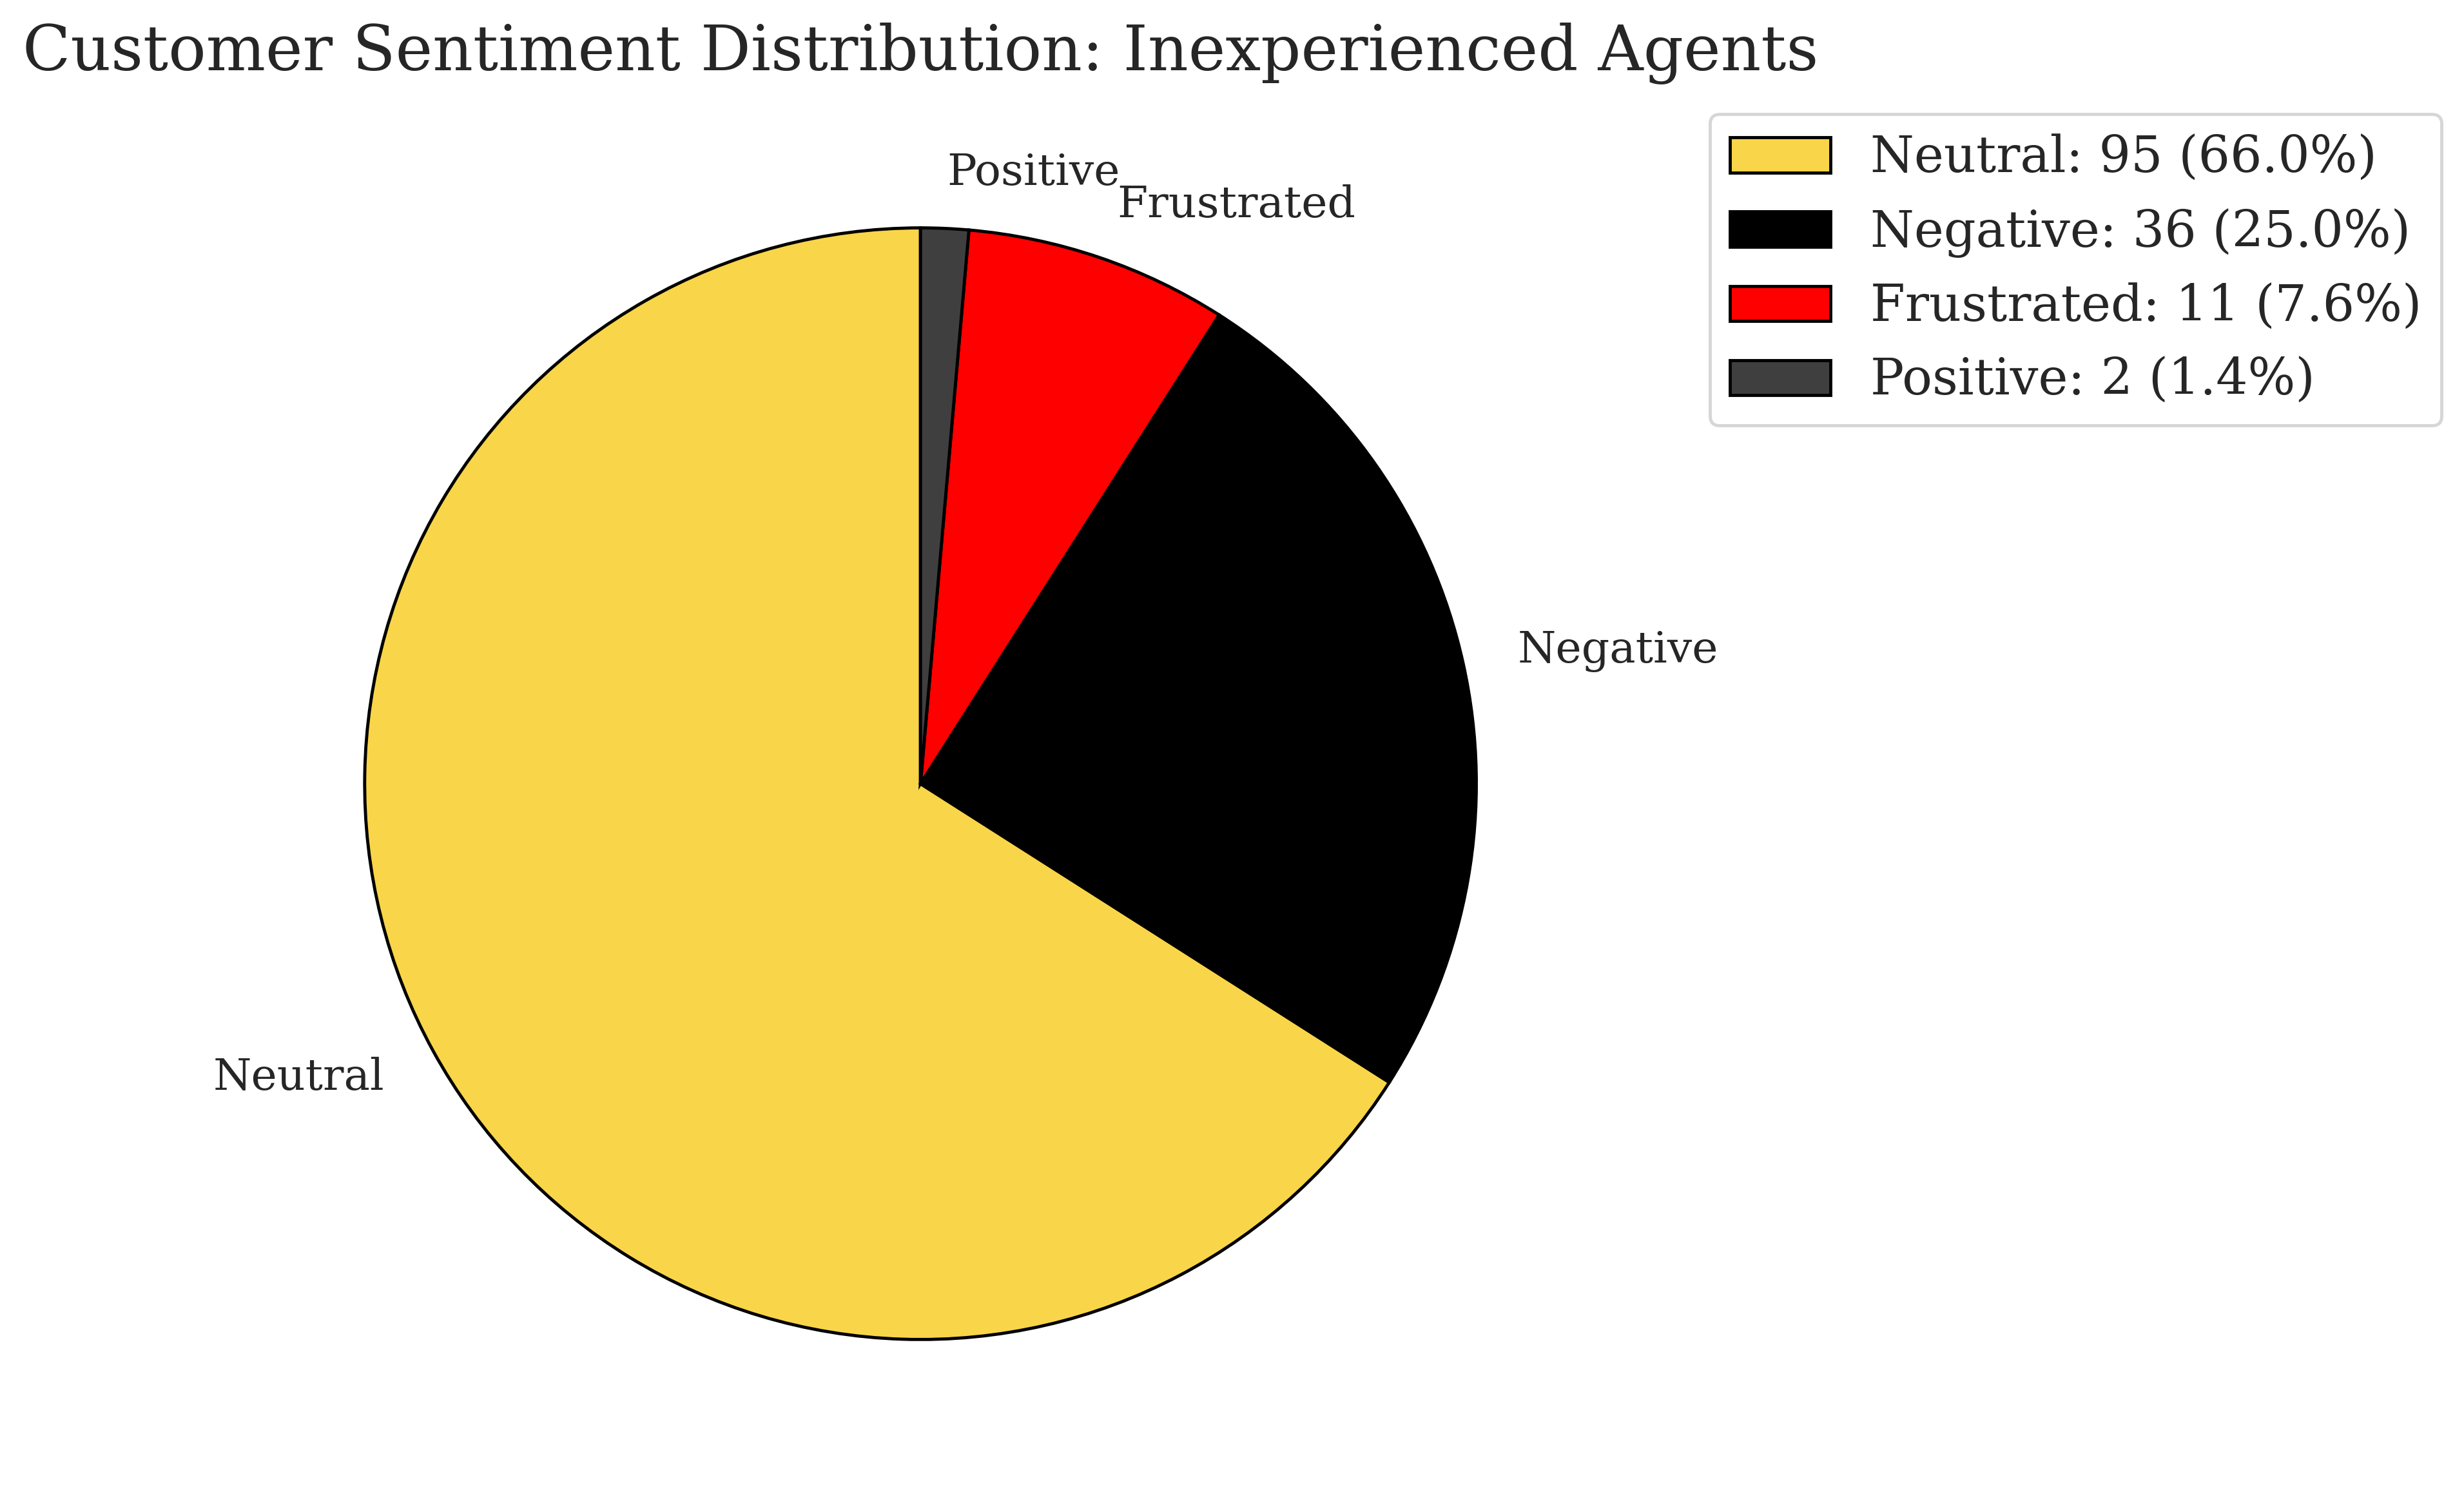

In [ ]:
level = customer_df['agent_experience_level'].unique()[2]
sentiment_counts = customer_df[customer_df['agent_experience_level'] == level]['customer_sentiment'].value_counts()

fig, ax = plt.subplots(figsize = (8,8), dpi = 350)
capitalized_labels = sentiment_counts.index.str.capitalize()
wedges, texts = ax.pie(
    sentiment_counts, labels = capitalized_labels,
    startangle = 90,
    colors = custom_color_palette_pie,
    wedgeprops = {'edgecolor': 'black'},
    labeldistance = 1.1
)

for text in texts:
  text.set_fontsize(14)

legend_labels = [f'{label.capitalize()}: {sentiment_counts[label]} ({sentiment_counts[label]/sentiment_counts.sum() * 100:.1f}%)' for label in sentiment_counts.index]

ax.legend(wedges, legend_labels, loc = 'upper left', bbox_to_anchor = (1.05,1), fontsize = 16)

plt.title('Customer Sentiment Distribution: Inexperienced Agents', fontsize = 20)

plt.show()

In [ ]:


experience_sentiment = pd.crosstab(customer_df['agent_experience_level'], customer_df['customer_sentiment'])

capitalized_columns_experience_sentiment_table = [col.capitalize() for col in experience_sentiment.columns]
capitalized_rows_experience_sentiment_table = [row.capitalize() for row in experience_sentiment.index]

fig, ax = plt.subplots(figsize = (7,2), dpi = 350)

fig.suptitle('Table: Customer Sentiment vs. Agent Experience Level', fontsize = 16, y = 1.05, ha = 'center')

ax.axis('off')
ax.axis('tight')

table = ax.table(cellText = experience_sentiment.values,
                 rowLabels = capitalized_rows_experience_sentiment_table,
                 colLabels = capitalized_columns_experience_sentiment_table,
                 cellLoc = 'center',
                 rowLoc = 'center',
                 colColours = [custom_color_palette_table[col.lower()] for col in capitalized_columns_experience_sentiment_table],
                 bbox = [0,0,1,1])

table.auto_set_font_size(False)
table.set_fontsize(14)


second_column_index = 1
fourth_column_index = 3

for (row, col), cell in table.get_celld().items():
  if row == 0:
    if col == 1 or col == 3:
      cell.set_text_props(color = 'white')
    else:
      cell.set_text_props(color = 'black')
  else:
    cell.set_text_props(color = 'black')

plt.tight_layout()
plt.subplots_adjust(top = 0.85)
plt.show()



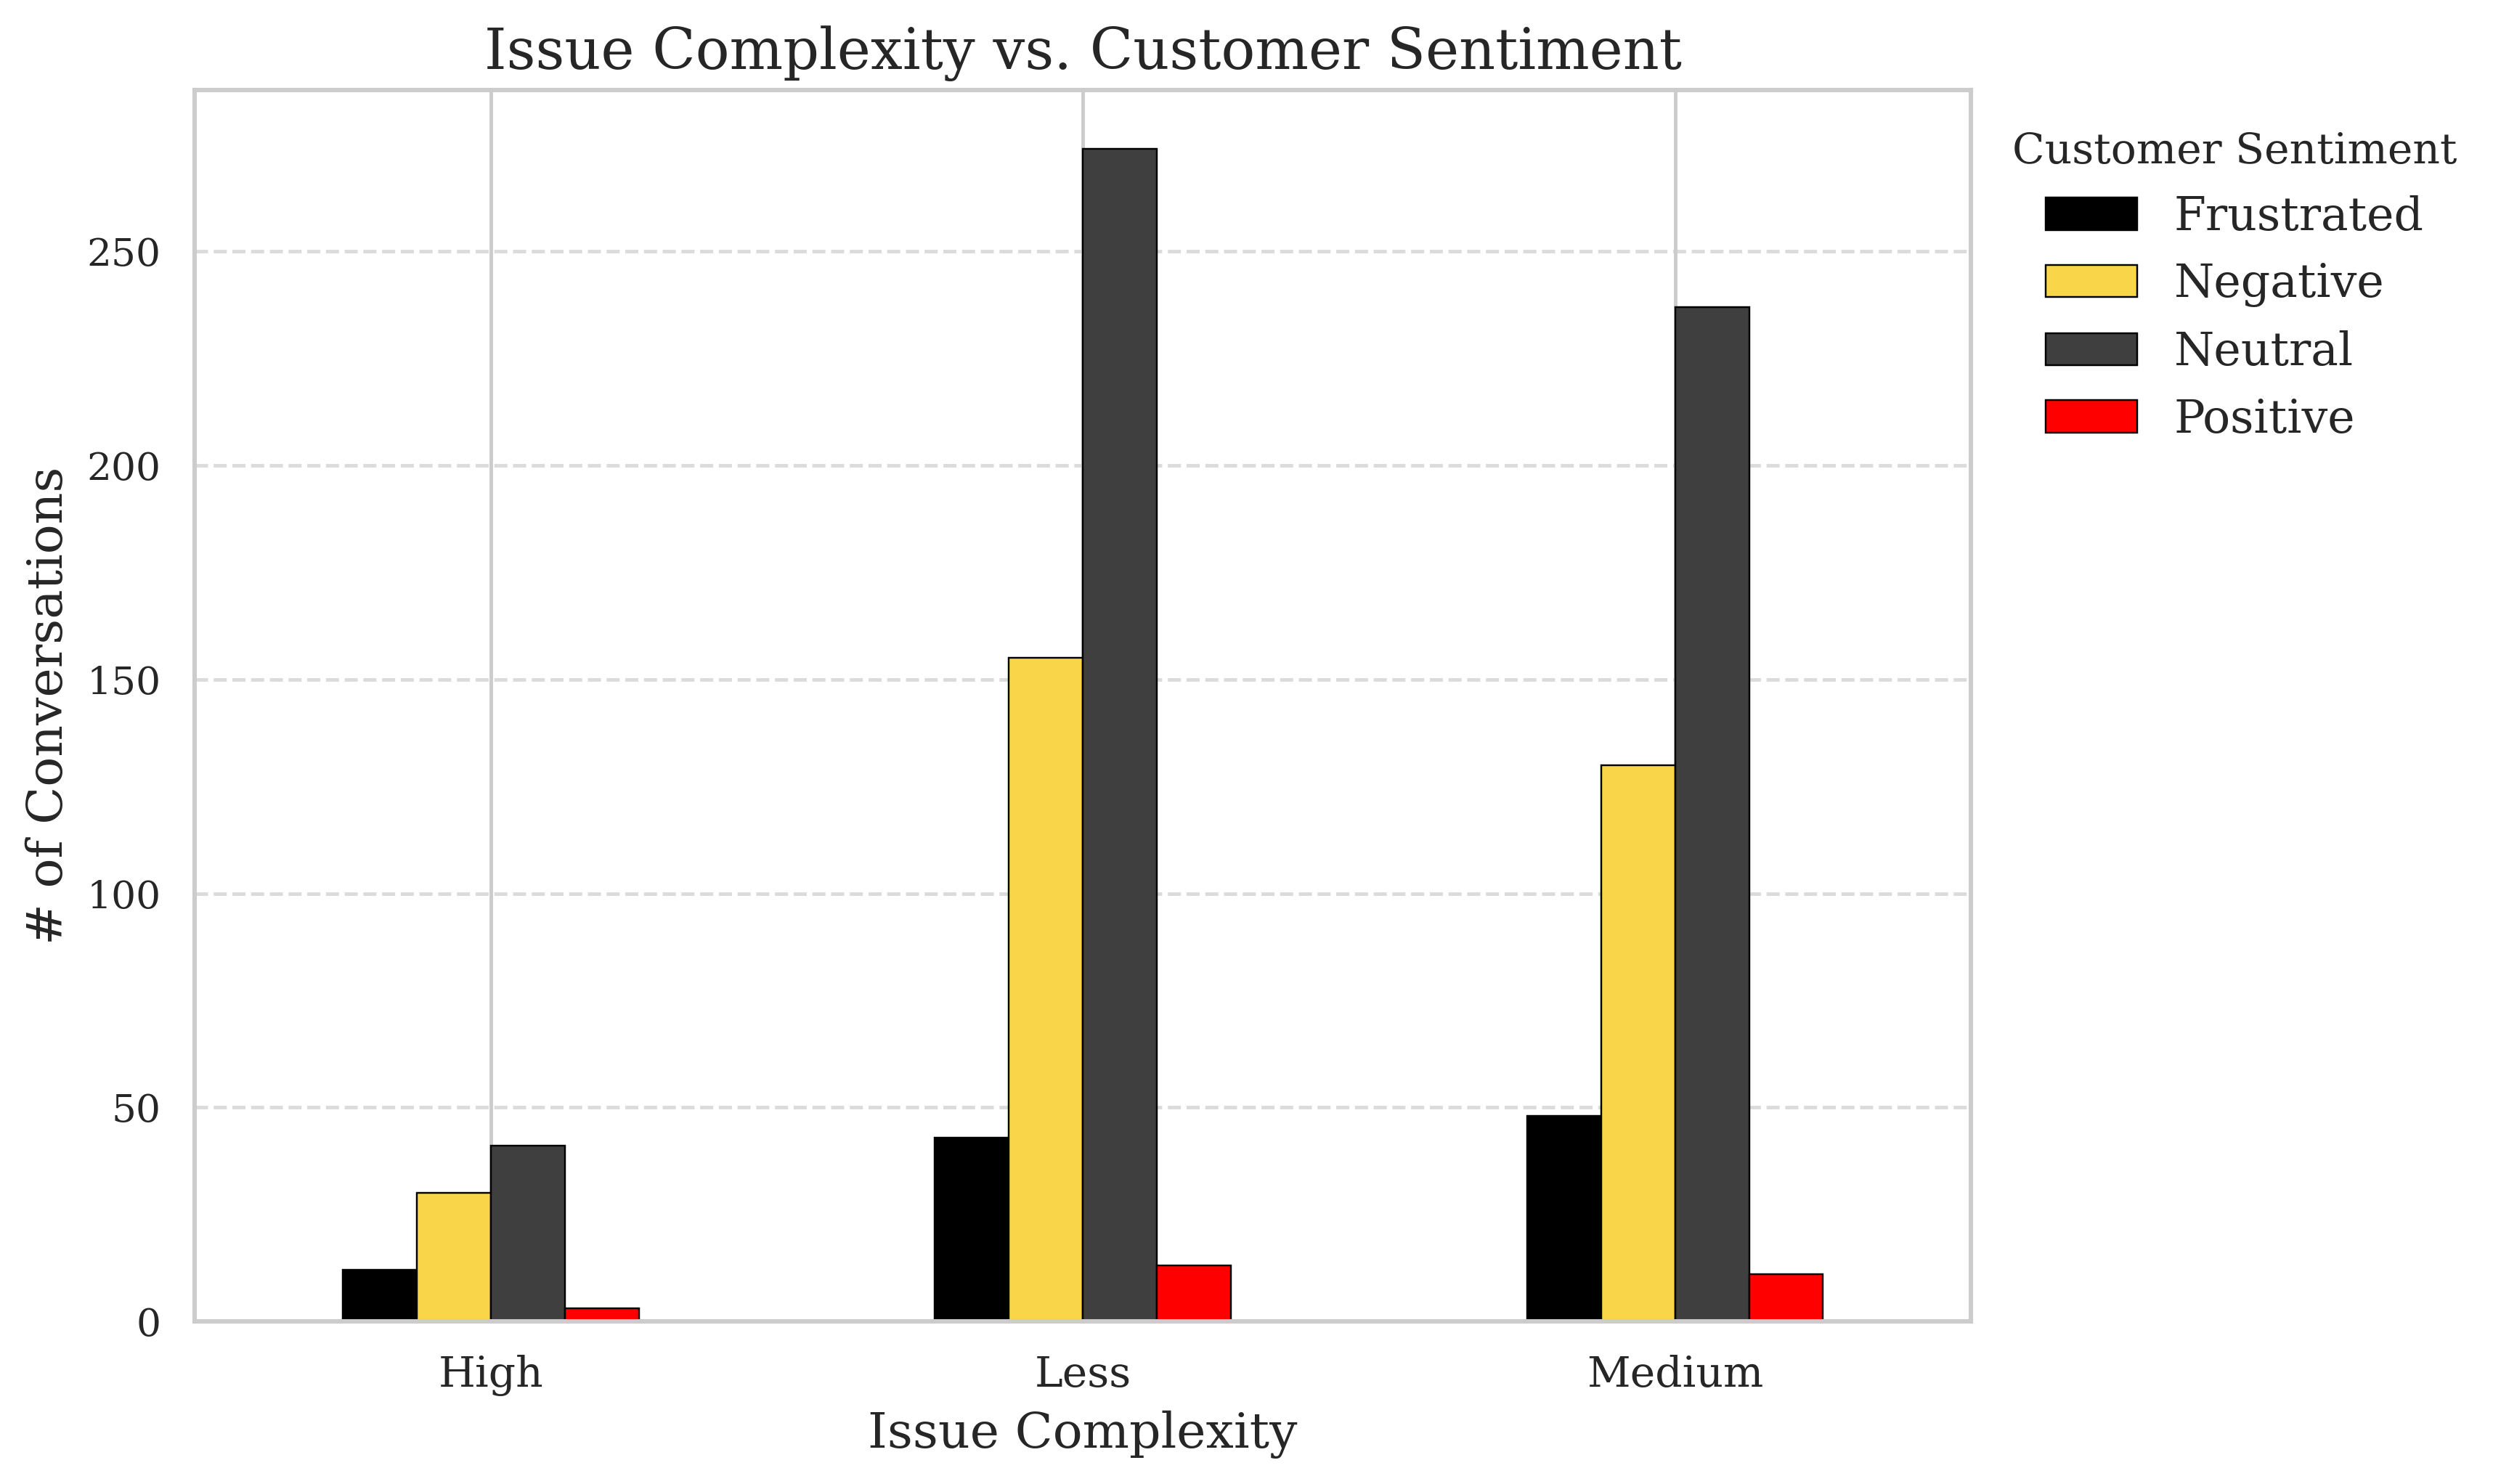

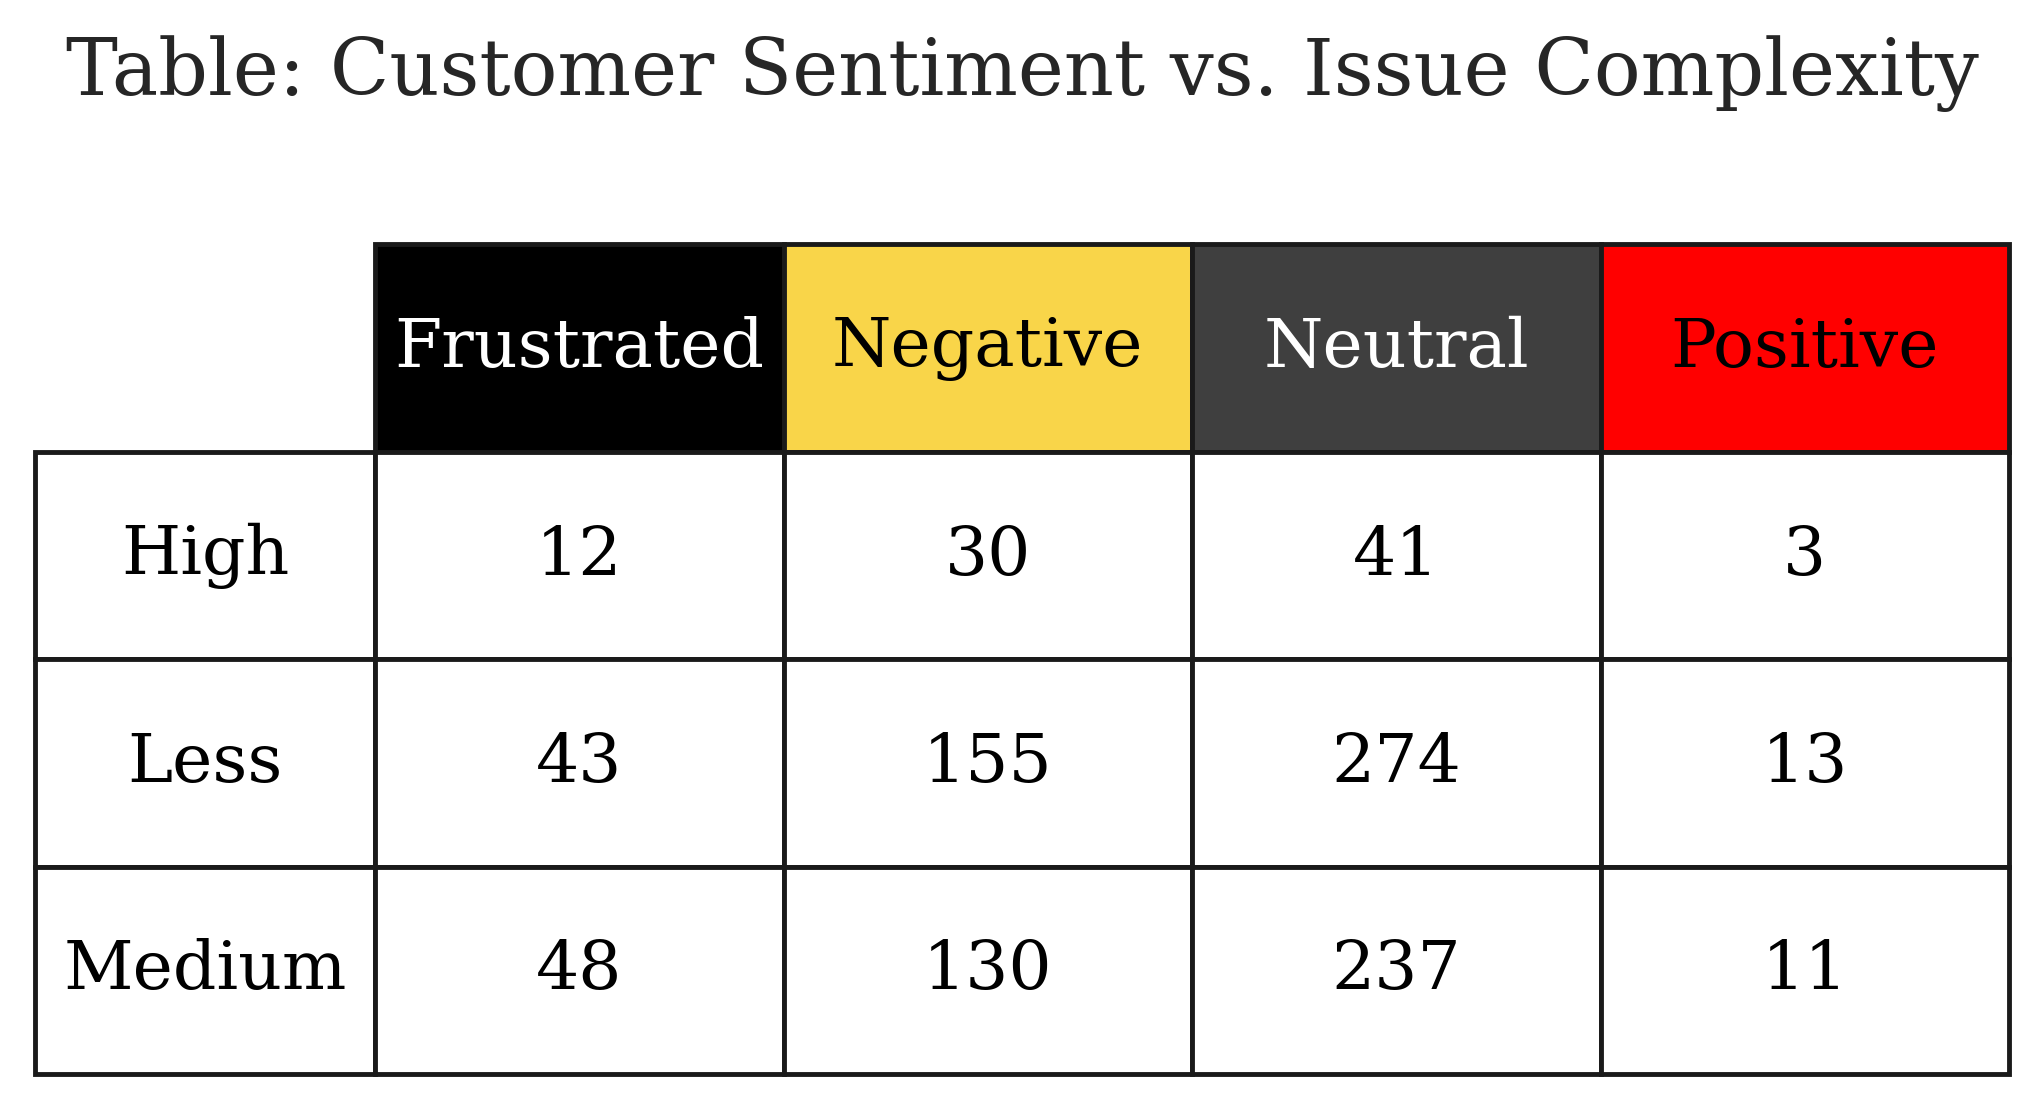

In [ ]:
custom_color_palette_complexity_sentiment = ['#000000', '#F9D549', '#3F3F3F', '#FF0000']

complexity_sentiment = customer_df.groupby(['issue_complexity', 'customer_sentiment']).size().unstack()

fig, ax = plt.subplots(figsize = (10,6), dpi = 350)

complexity_sentiment.plot(kind = 'bar', ax = ax, color = custom_color_palette_complexity_sentiment, edgecolor = 'black', linewidth = 0.5)

plt.rc('font', family = 'serif')

ax.set_title('Issue Complexity vs. Customer Sentiment', fontsize = 16)
ax.set_xlabel('Issue Complexity', fontsize = 14)
ax.set_ylabel('# of Conversations', fontsize = 14)
ax.set_xticks(range(len(complexity_sentiment.index)))
ax.set_xticklabels([label.title() for label in complexity_sentiment.index], rotation = 0, fontsize = 12)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [label.title() for label in labels], title = 'Customer Sentiment', fontsize = 13, loc = 'upper left', bbox_to_anchor = (1.0, 1.0), frameon = False)

plt.tight_layout()
plt.show()

custom_color_palette_complexity_table = {
    'frustrated': '#000000',
    'negative': '#F9D549',
    'neutral': '#3F3F3F',
    'positive': '#FF0000'
}


capitalized_columns_complexity_sentiment = [col.capitalize() for col in complexity_sentiment.columns]
capitalized_rows_complexity_sentiment = [row.capitalize() for row in complexity_sentiment.index]

fig, ax = plt.subplots(figsize = (6,3), dpi = 350)

fig.suptitle('Table: Customer Sentiment vs. Issue Complexity', fontsize = 16, y = 1.05, ha = 'center')

ax.axis('off')
ax.axis('tight')

table = ax.table(cellText = complexity_sentiment.values,
                 rowLabels = capitalized_rows_complexity_sentiment,
                 colLabels = capitalized_columns_complexity_sentiment,
                 cellLoc = 'center',
                 rowLoc = 'center',
                 colColours = [custom_color_palette_complexity_table[col.lower()] for col in capitalized_columns_complexity_sentiment],
                 bbox = [0,0,1,1])

table.auto_set_font_size(False)
table.set_fontsize(14)

second_column_index = 0
fourth_column_index = 2

for (row, col), cell in table.get_celld().items():
  if row == 0:
    if col == 0 or col == 2:
      cell.set_text_props(color = 'white')
    else:
      cell.set_text_props(color = 'black')
  else:
    cell.set_text_props(color = 'black')

plt.tight_layout()
plt.subplots_adjust(top = 0.85)
plt.show()

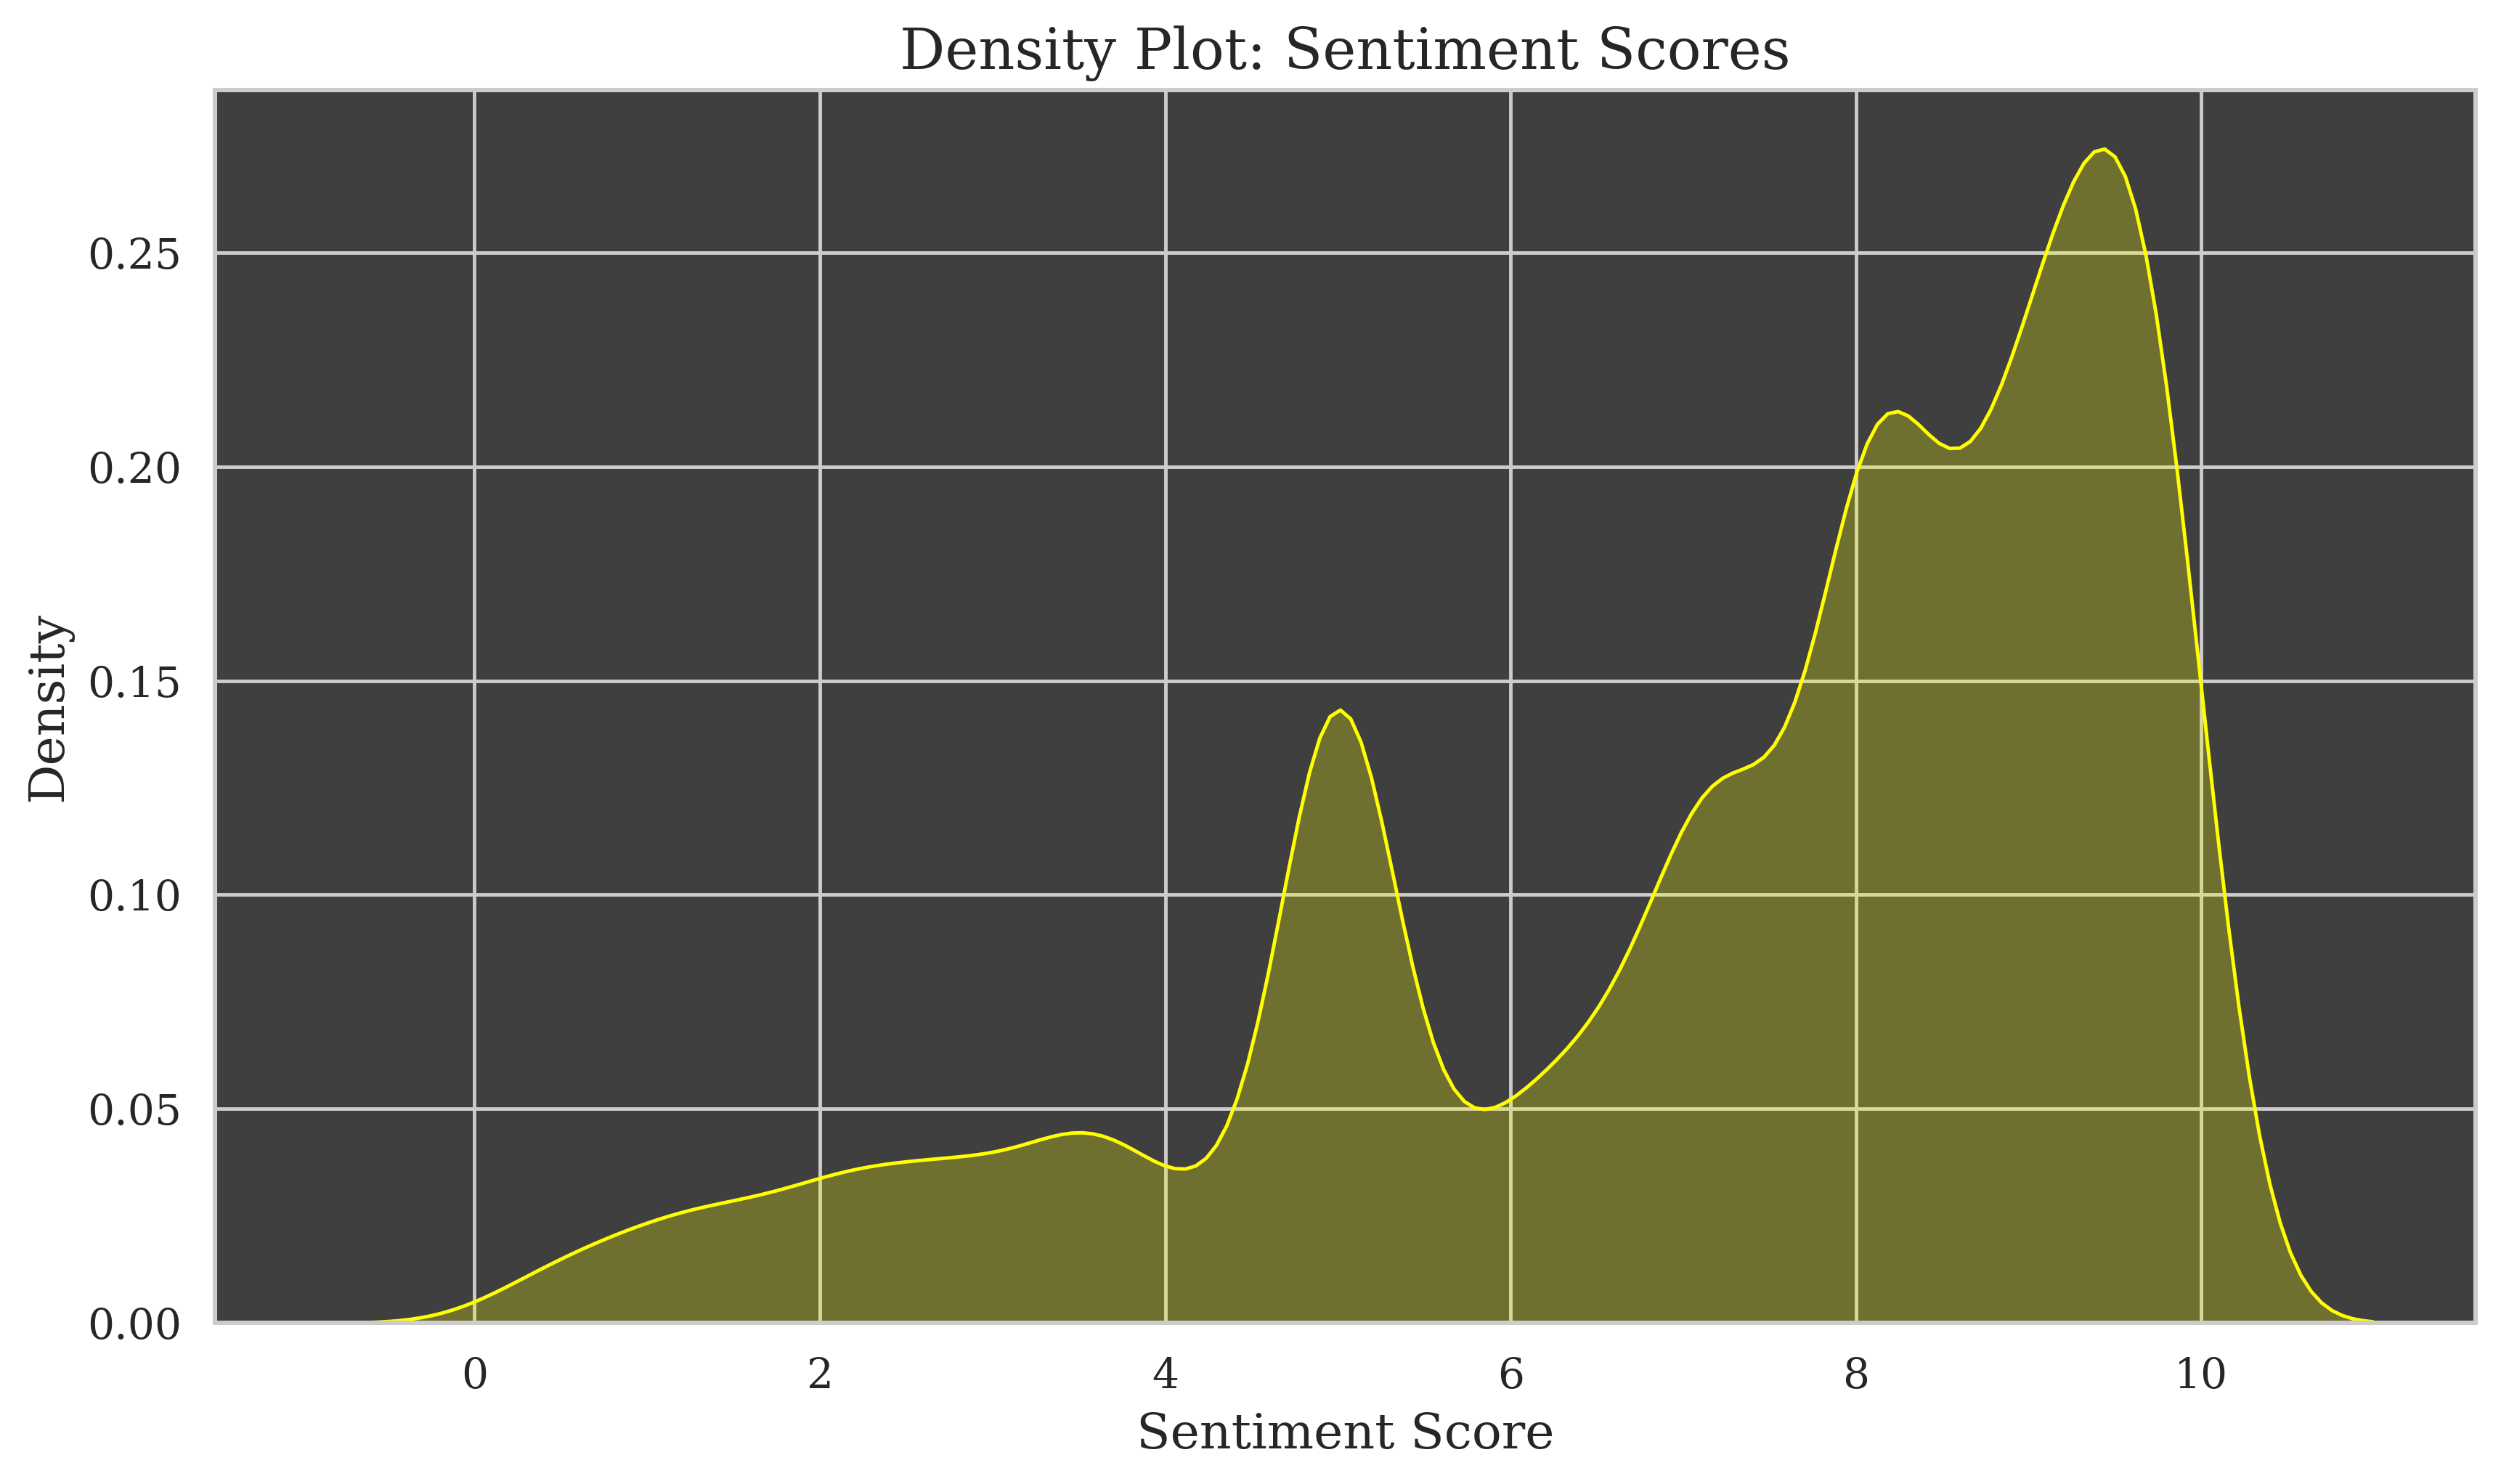

In [ ]:
plt.figure(figsize = (10,6), dpi = 350)

plt.rc('font', family = 'serif')

plt.gca().set_facecolor(to_rgba('#3f3f3f'))
plt.gcf().patch.set_facecolor(to_rgba('white'))

sns.kdeplot(amazon_df['text_vader_sentiment_1_10'], color = 'yellow', fill = True)


plt.title('Density Plot: Sentiment Scores', fontsize = 16, family = 'serif')
plt.xlabel('Sentiment Score', fontsize = 14, family = 'serif')
plt.ylabel('Density', fontsize = 14, family = 'serif')

plt.xticks(fontsize = 12, family = 'serif')
plt.yticks(fontsize = 12, family = 'serif')

plt.tight_layout()
plt.show()

In [ ]:
sentiment_data = amazon_df['text_vader_sentiment_1_10']

kde = gaussian_kde(sentiment_data)
x_vals = np.linspace(sentiment_data.min(), sentiment_data.max(), 1000)
y_vals = kde(x_vals) * len(sentiment_data)

plt.figure(figsize = (10,6), dpi = 350)

plt.rc('font', family = 'serif')


plt.gca().set_facecolor(to_rgba('#3f3f3f'))
plt.gcf().patch.set_facecolor(to_rgba('white'))

# sns.histplot(sentiment_data, bins = 20, color = '#2e2e2e', edgecolor = None, alpha = 0.05)

plt.plot(x_vals, y_vals, color = '#F9D549', linewidth = 3, alpha = 1)

plt.title('Density Plot: Sentiment Scores', fontsize = 16, family = 'serif')
plt.xlabel('Sentiment Score', fontsize = 14, family = 'serif',)
plt.ylabel('Frequency', fontsize = 14, family = 'serif')

plt.xticks(fontsize = 12, family = 'serif')
plt.yticks(fontsize = 12, family = 'serif')

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

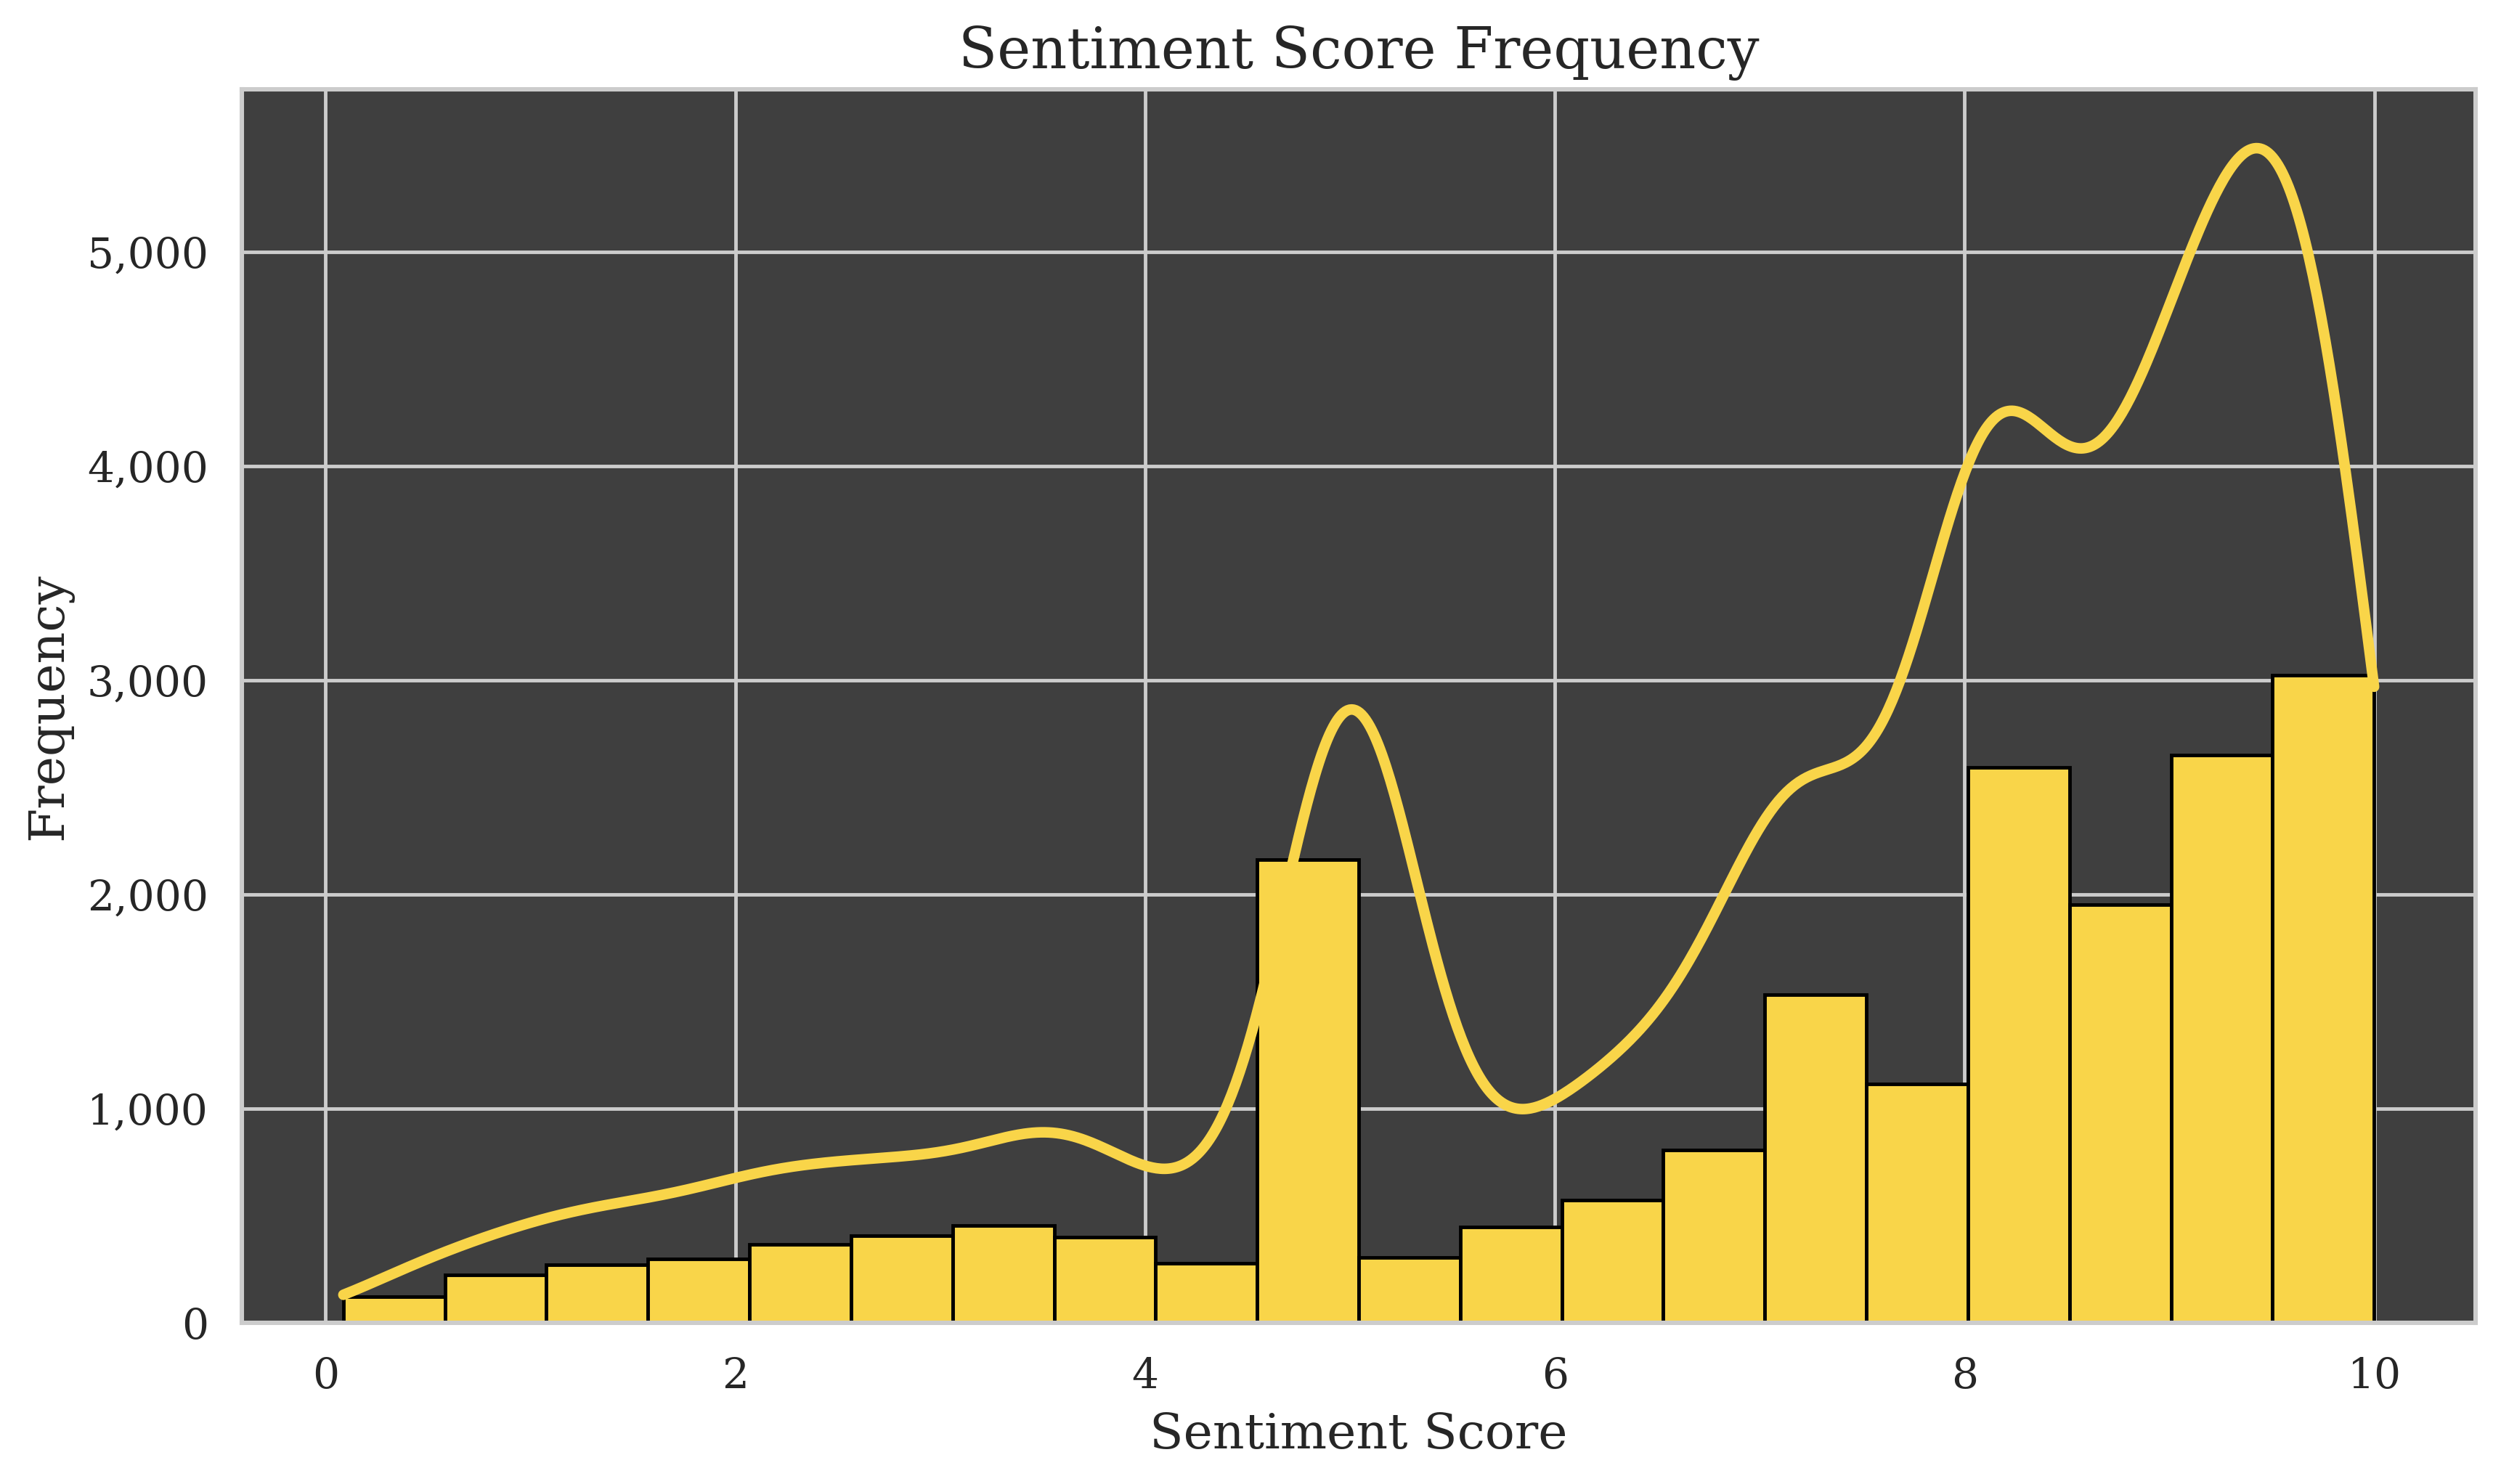

In [ ]:
sentiment_data = amazon_df['text_vader_sentiment_1_10']

kde = gaussian_kde(sentiment_data)
x_vals = np.linspace(sentiment_data.min(), sentiment_data.max(), 1000)
y_vals = kde(x_vals) * len(sentiment_data)

plt.figure(figsize = (10,6), dpi = 350)

plt.rc('font', family = 'serif')


plt.gca().set_facecolor(to_rgba('#3f3f3f'))
plt.gcf().patch.set_facecolor(to_rgba('white'))

sns.histplot(sentiment_data, bins = 20, color = '#f9d549', edgecolor = 'black', alpha = 1)

plt.plot(x_vals, y_vals, color = '#f9d549', linewidth = 3, alpha = 1)

plt.title('Sentiment Score Frequency', fontsize = 16, family = 'serif')
plt.xlabel('Sentiment Score', fontsize = 14, family = 'serif',)
plt.ylabel('Frequency', fontsize = 14, family = 'serif')

plt.xticks(fontsize = 12, family = 'serif')
plt.yticks(fontsize = 12, family = 'serif')

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

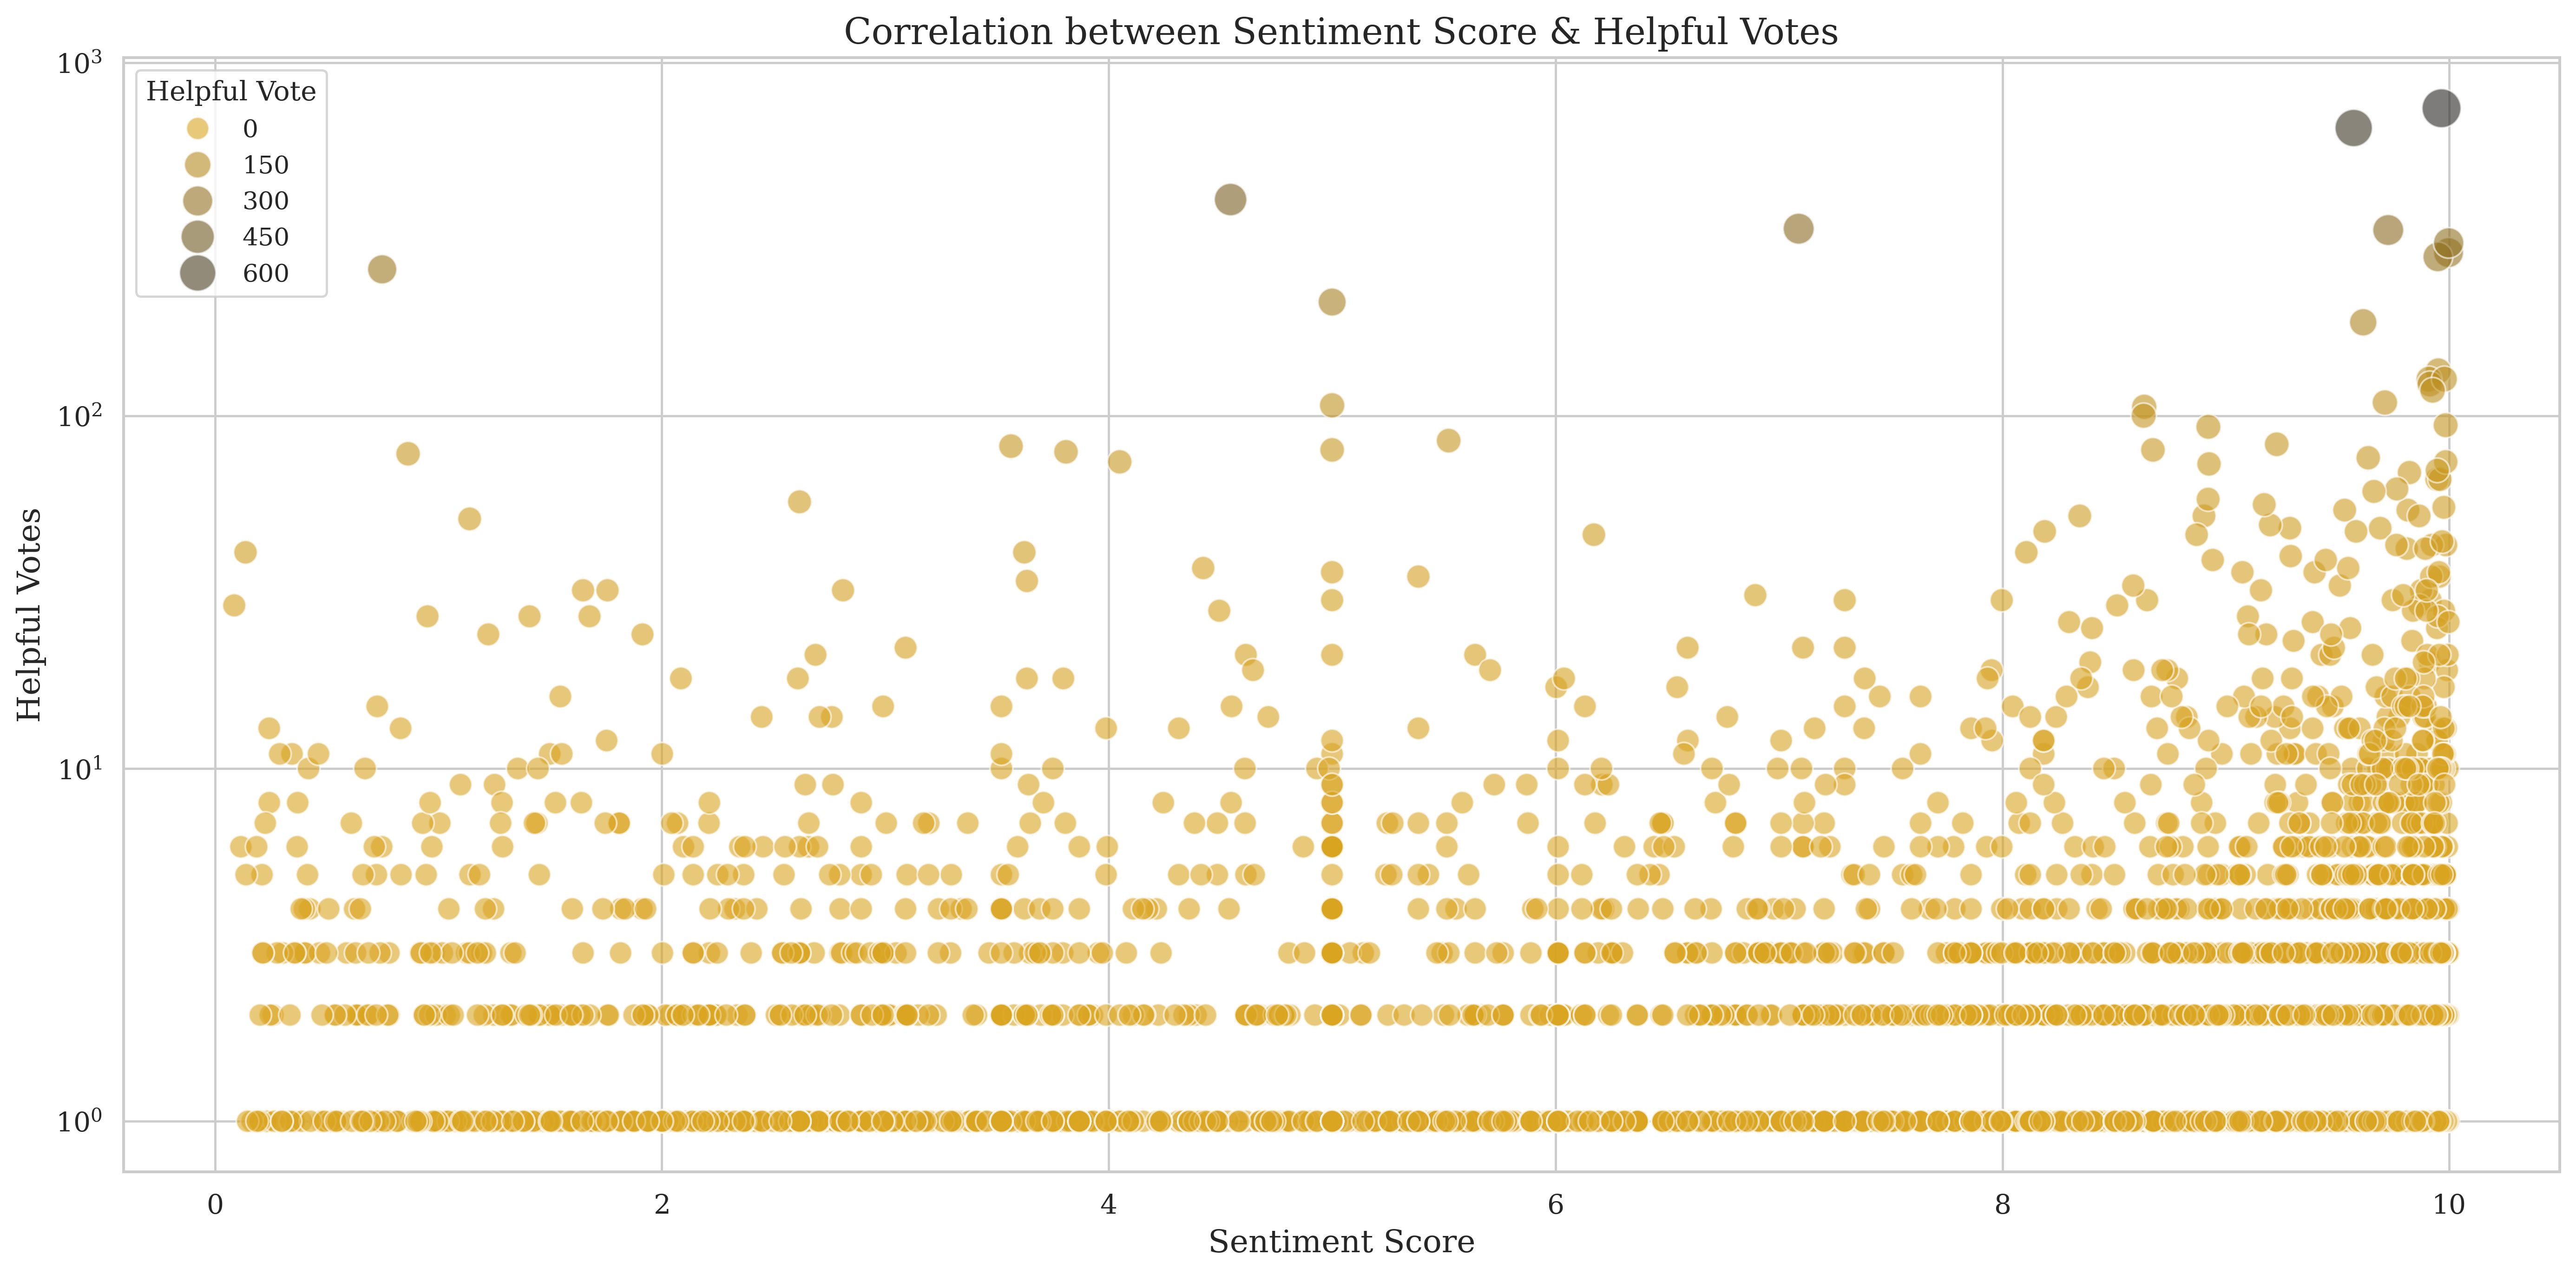

In [ ]:
plt.figure(figsize = (16,8), dpi = 350)

cmap = sns.dark_palette('#DAA520', reverse = True, as_cmap = True)

plt.rc('font', family = 'serif')

scatter_plot = sns.scatterplot(data = amazon_df, x = 'text_vader_sentiment_1_10', y = 'helpful_vote', size = 'helpful_vote', sizes = (100,300), hue = 'helpful_vote', palette = cmap, alpha = 0.6)

scatter_plot.legend(title = 'Helpful Vote')

plt.yscale('log')

plt.title('Correlation between Sentiment Score & Helpful Votes', fontsize = 16, family = 'serif')
plt.xlabel('Sentiment Score', fontsize = 14, family = 'serif')
plt.ylabel('Helpful Votes', fontsize = 14, family = 'serif')

plt.xticks(fontsize = 12, family = 'serif')
plt.yticks(fontsize = 12, family = 'serif')

plt.tight_layout()
plt.show()

In [ ]:
# custom_colors = ['lightblue', 'lightskyblue', 'skyblue', 'deepskyblue']
custom_colors = ['#FFD700', '#FFA500', '#000000']

custom_cmap = LinearSegmentedColormap.from_list('custom_palette', custom_colors, N = 256)

plt.figure(figsize = (16,8), dpi = 350)
plt.rc('font', family = 'serif')

hb = plt.hexbin(amazon_df['text_vader_sentiment_1_10'], amazon_df['helpful_vote'], gridsize = 60, cmap = custom_cmap, mincnt = 1, edgecolors = 'black')

plt.title('Hexbin Plot: Sentiment Score vs. Helpful Votes', fontsize = 16, family = 'serif')
plt.xlabel('Sentiment Score', fontsize = 14, family = 'serif')
plt.ylabel('Helpful Votes', fontsize = 14, family = 'serif')

plt.xticks(fontsize = 12, family = 'serif')
plt.yticks(fontsize = 12, family = 'serif')

colorbar = plt.colorbar(hb, label = 'Count')
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
colorbar.ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

## Table Creation for EDA

In [ ]:
experience_sentiment = pd.crosstab(customer_df['agent_experience_level'], customer_df['customer_sentiment'])

capitalized_columns_experience_sentiment_table = [col.capitalize() for col in experience_sentiment.columns]
capitalized_rows_experience_sentiment_table = [row.capitalize() for row in experience_sentiment.index]

fig, ax = plt.subplots(figsize = (7,2), dpi = 350)

fig.suptitle('Table: Customer Sentiment vs. Agent Experience Level', fontsize = 16, y = 1.05, ha = 'center')

ax.axis('off')
ax.axis('tight')

table = ax.table(cellText = experience_sentiment.values,
                 rowLabels = capitalized_rows_experience_sentiment_table,
                 colLabels = capitalized_columns_experience_sentiment_table,
                 cellLoc = 'center',
                 rowLoc = 'center',
                 colColours = [custom_color_palette_table[col.lower()] for col in capitalized_columns_experience_sentiment_table],
                 bbox = [0,0,1,1])

table.auto_set_font_size(False)
table.set_fontsize(14)

second_column_index = 1
fourth_column_index = 3

for (row, col), cell in table.get_celld().items():
  if row == 0:
    if col == 1 or col == 3:
      cell.set_text_props(color = 'white')
    else:
      cell.set_text_props(color = 'black')
  else:
    cell.set_text_props(color = 'black')
plt.tight_layout()
plt.subplots_adjust(top = 0.85)
plt.show()

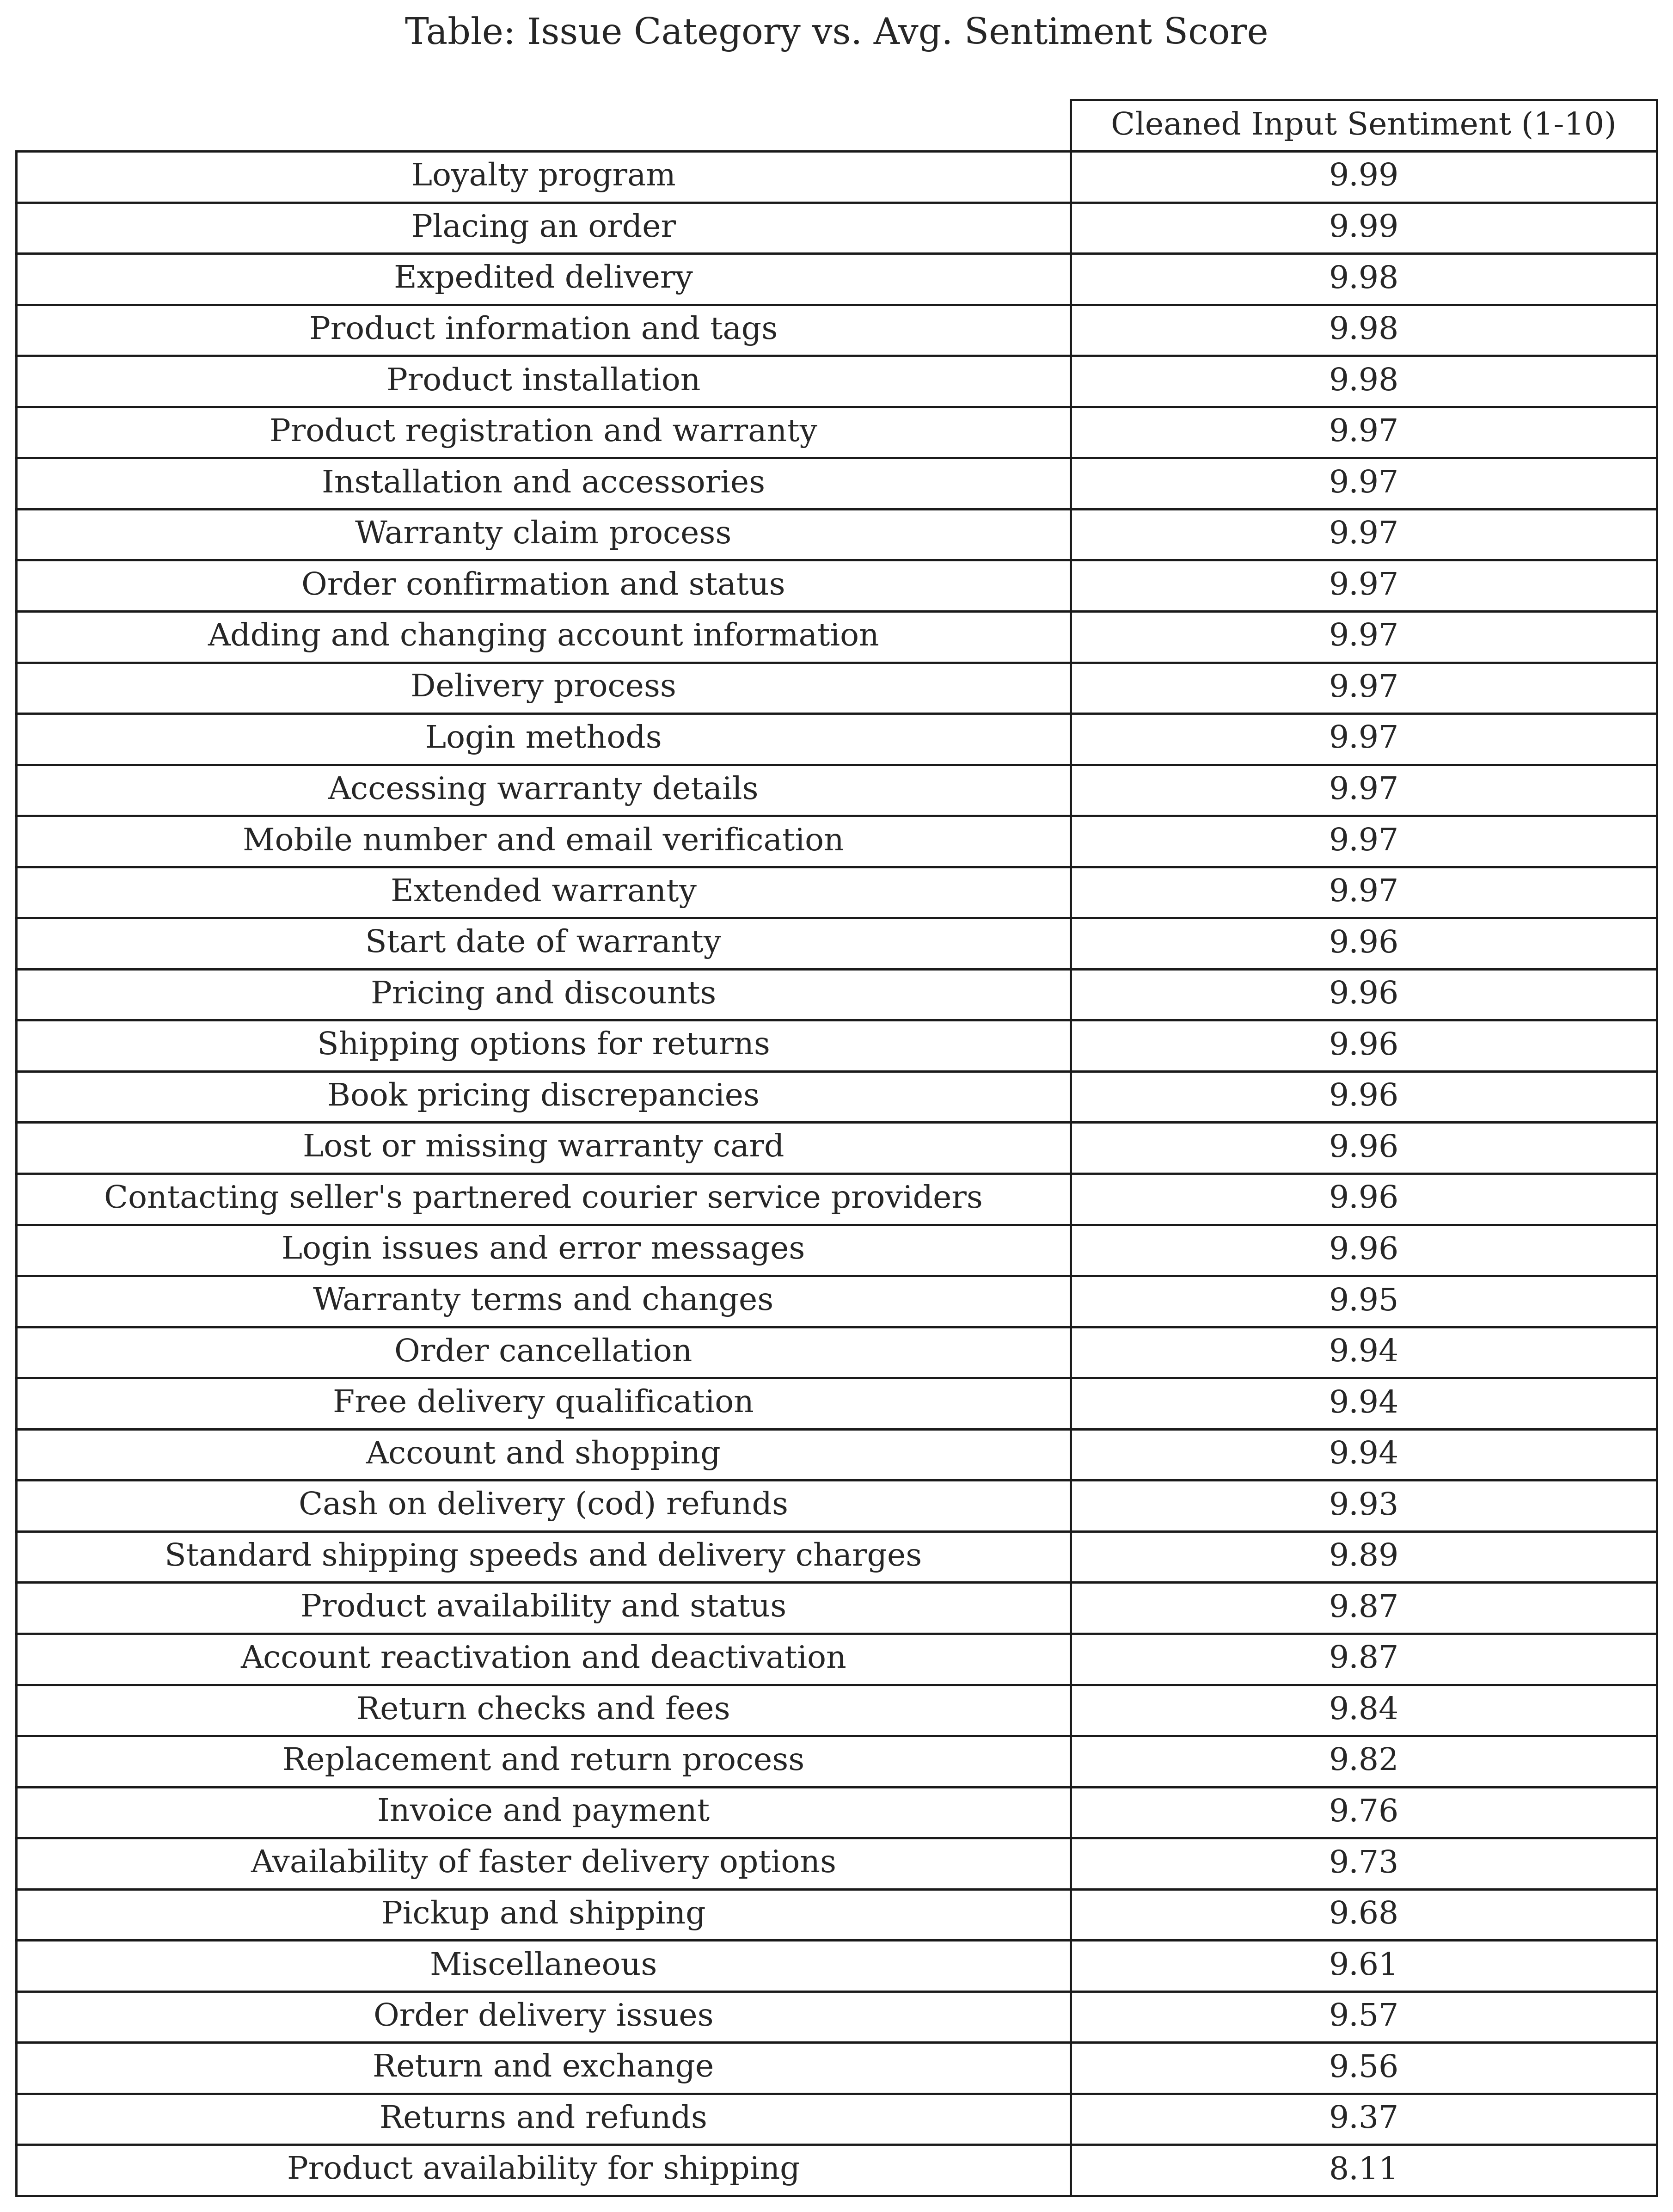

In [ ]:
sentiment_by_issue_category = customer_df.groupby('issue_category')[['cleaned_input_sentiment_1_10']].mean()

sentiment_by_issue_category = sentiment_by_issue_category.sort_values(by='cleaned_input_sentiment_1_10', ascending=False)

capitalized_rows_sentiment_issue_category = [row.capitalize() for row in sentiment_by_issue_category.index]
capitalized_columns_sentiment_issue_category = ['Cleaned Input Sentiment (1-10)']

fig, ax = plt.subplots(figsize=(10.5, 13), dpi = 350)
fig.suptitle('Table: Issue Category vs. Avg. Sentiment Score', fontsize=16, y=1.05, ha='center')
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=sentiment_by_issue_category.values.round(2),
                 rowLabels=capitalized_rows_sentiment_issue_category,
                 colLabels=capitalized_columns_sentiment_issue_category,
                 cellLoc='center',
                 rowLoc='center',
                 bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(14)

plt.tight_layout()
plt.subplots_adjust(top=1.01)
plt.show()

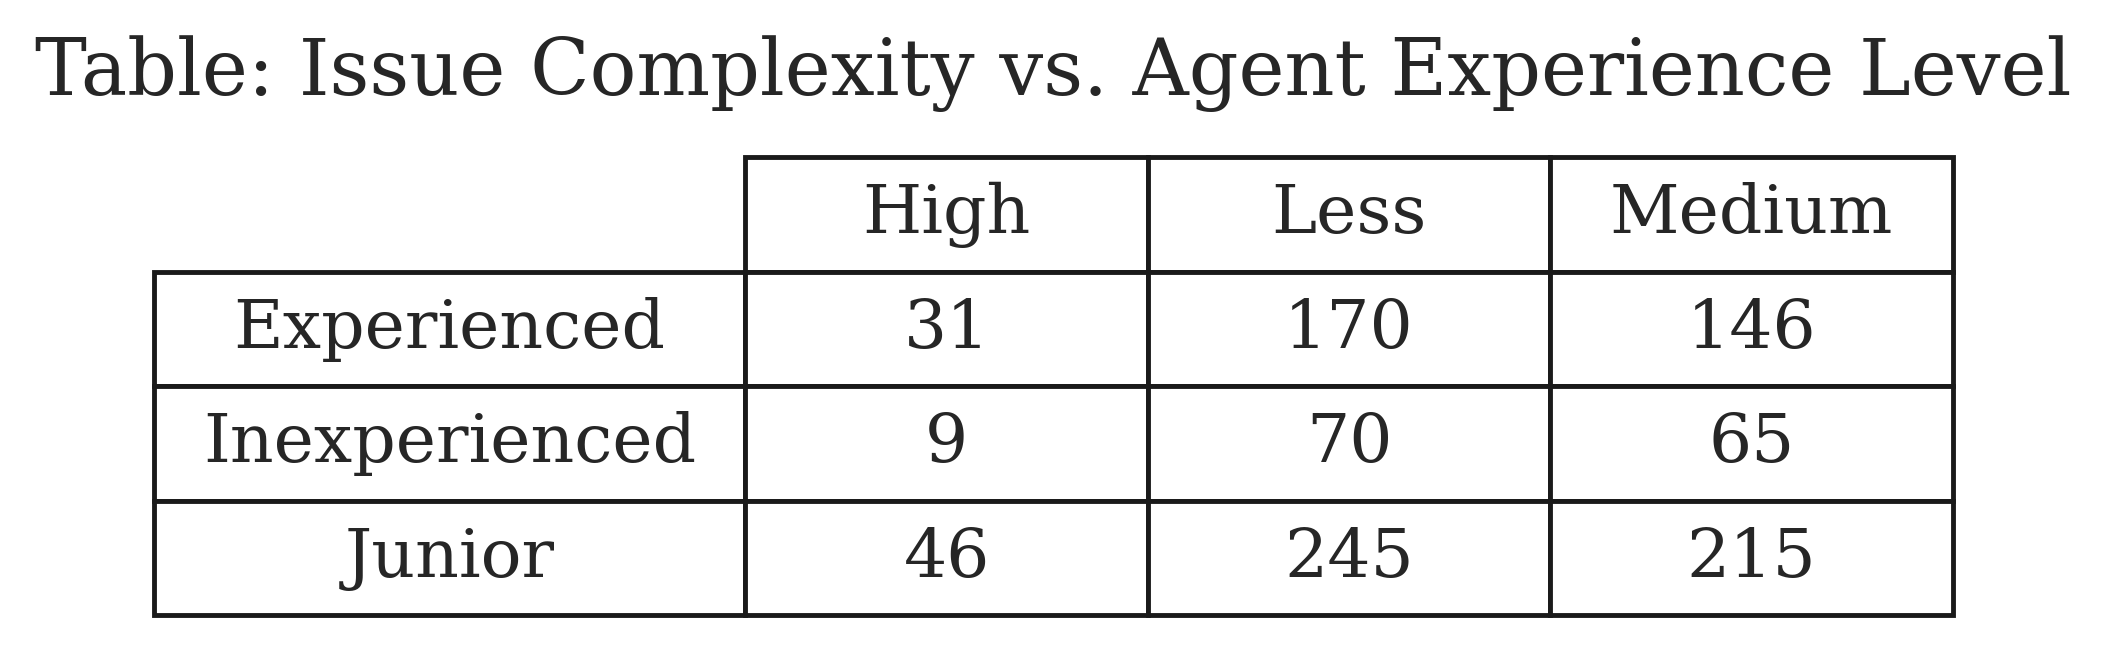

In [ ]:
complexity_experience = pd.crosstab(customer_df['agent_experience_level'], customer_df['issue_complexity'])

capitalized_columns_complexity_experience = [col.capitalize() for col in complexity_experience.columns]
capitalized_rows_complexity_experience = [row.capitalize() for row in complexity_experience.index]

fig, ax = plt.subplots(figsize=(5.5, 1.75), dpi = 350)
fig.suptitle('Table: Issue Complexity vs. Agent Experience Level', fontsize=16, y=1.05, ha='center')
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=complexity_experience.values,
                 rowLabels=capitalized_rows_complexity_experience,
                 colLabels=capitalized_columns_complexity_experience,
                 cellLoc='center',
                 rowLoc='center',
                 bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(14)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


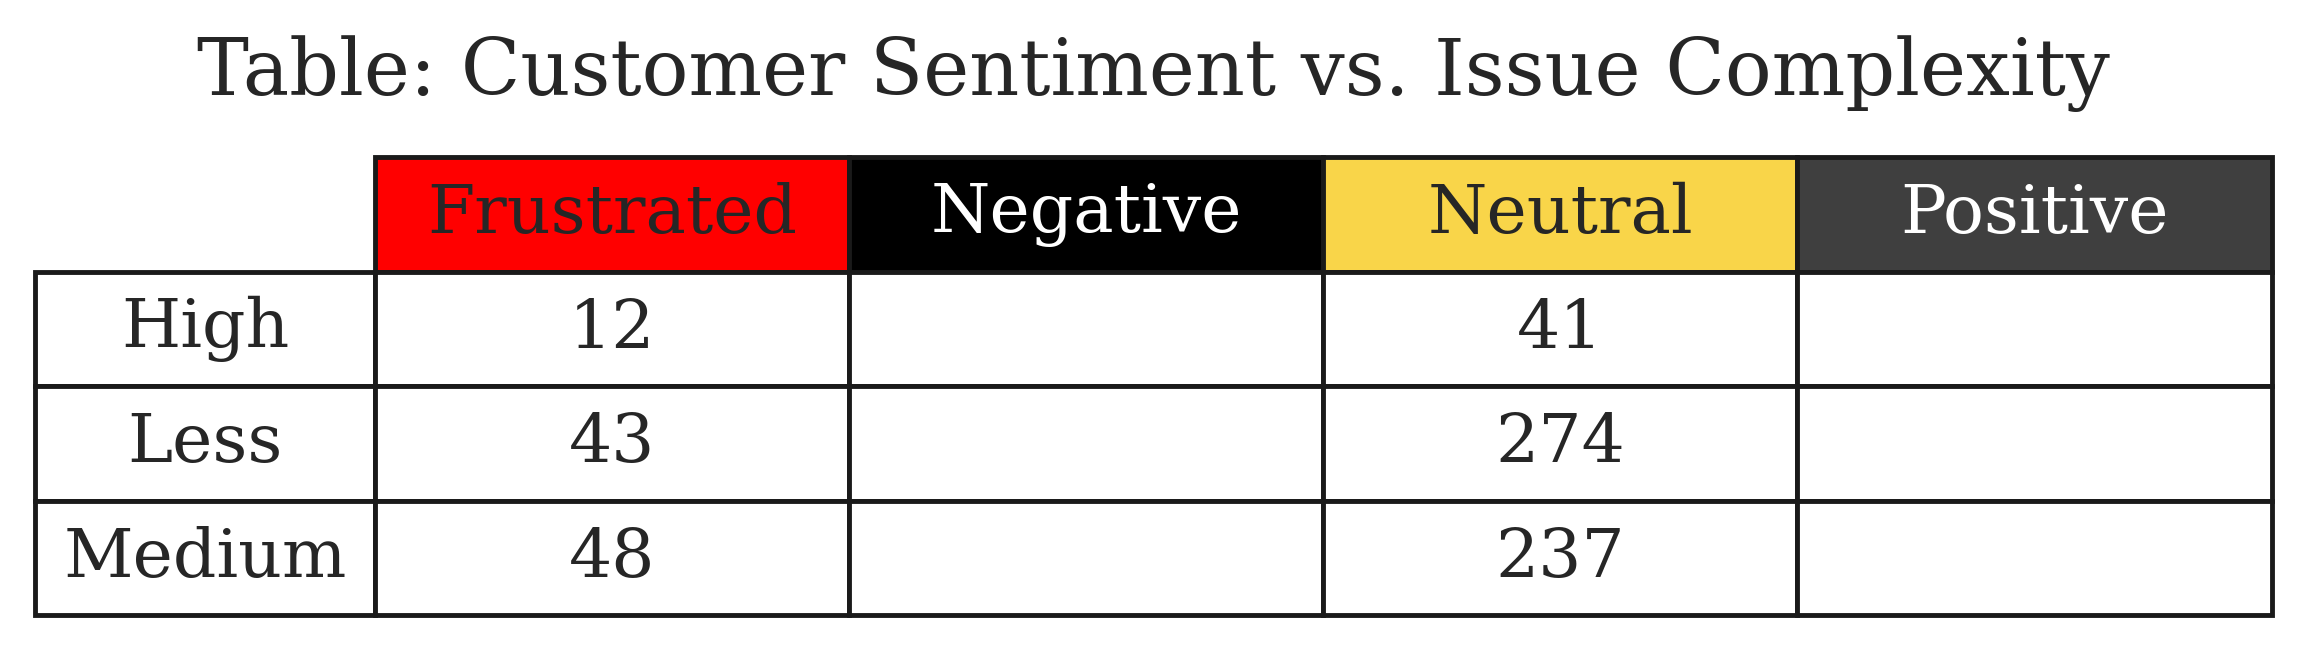

In [ ]:
sentiment_complexity = pd.crosstab(customer_df['issue_complexity'], customer_df['customer_sentiment'])

capitalized_columns_sentiment_complexity = [col.capitalize() for col in sentiment_complexity.columns]
capitalized_rows_sentiment_complexity = [row.capitalize() for row in sentiment_complexity.index]

fig, ax = plt.subplots(figsize=(6.75, 1.75), dpi = 350)
fig.suptitle('Table: Customer Sentiment vs. Issue Complexity', fontsize=16, y = 1.05, ha='center')
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=sentiment_complexity.values,
                 rowLabels=capitalized_rows_sentiment_complexity,
                 colLabels=capitalized_columns_sentiment_complexity,
                 cellLoc='center',
                 rowLoc='center',
                 colColours=[custom_color_palette_table[col.lower()] for col in capitalized_columns_sentiment_complexity],
                 bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(14)

second_column_index = 1
fourth_column_index = 3

for (row, col), cell in table.get_celld().items():
  if row == 0:
    if col == 1 or col == 3:
      cell.set_text_props(color = 'white')
    else:
      cell.set_text_props(color = 'black')
  else:
    cell.set_text_props(color = 'black')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

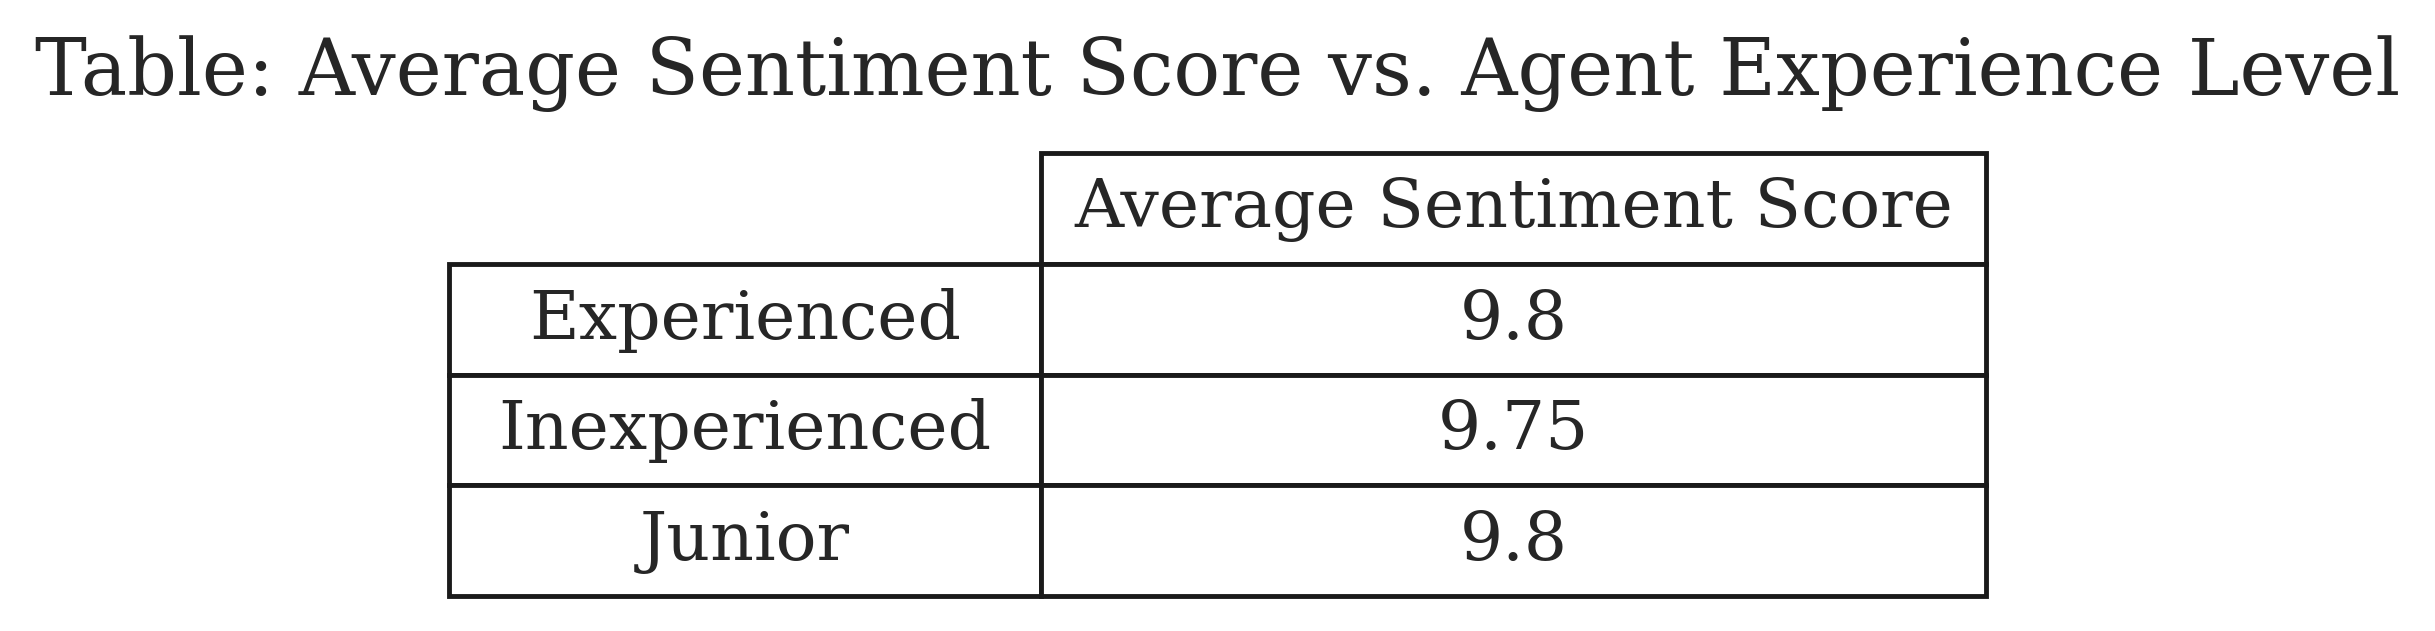

In [ ]:
# Ensure the sentiment score column is numeric
customer_df['cleaned_input_sentiment_1_10'] = pd.to_numeric(customer_df['cleaned_input_sentiment_1_10'], errors='coerce')

# Group by agent experience level and calculate mean sentiment score
avg_sentiment_by_experience = customer_df.groupby('agent_experience_level')['cleaned_input_sentiment_1_10'].mean()

# Capitalize the index and prepare the table content
capitalized_rows_avg_sentiment = [row.capitalize() for row in avg_sentiment_by_experience.index]
capitalized_columns_avg_sentiment = ['Average Sentiment Score']

# Create the table visualization
fig, ax = plt.subplots(figsize=(4.75, 1.7), dpi = 350)
fig.suptitle('Table: Average Sentiment Score vs. Agent Experience Level', fontsize=16, y=1.05, ha='center')
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=[[value] for value in avg_sentiment_by_experience.round(2)],  # Convert series to list of lists
                 rowLabels=capitalized_rows_avg_sentiment,
                 colLabels=capitalized_columns_avg_sentiment,
                 cellLoc='center',
                 rowLoc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(14)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


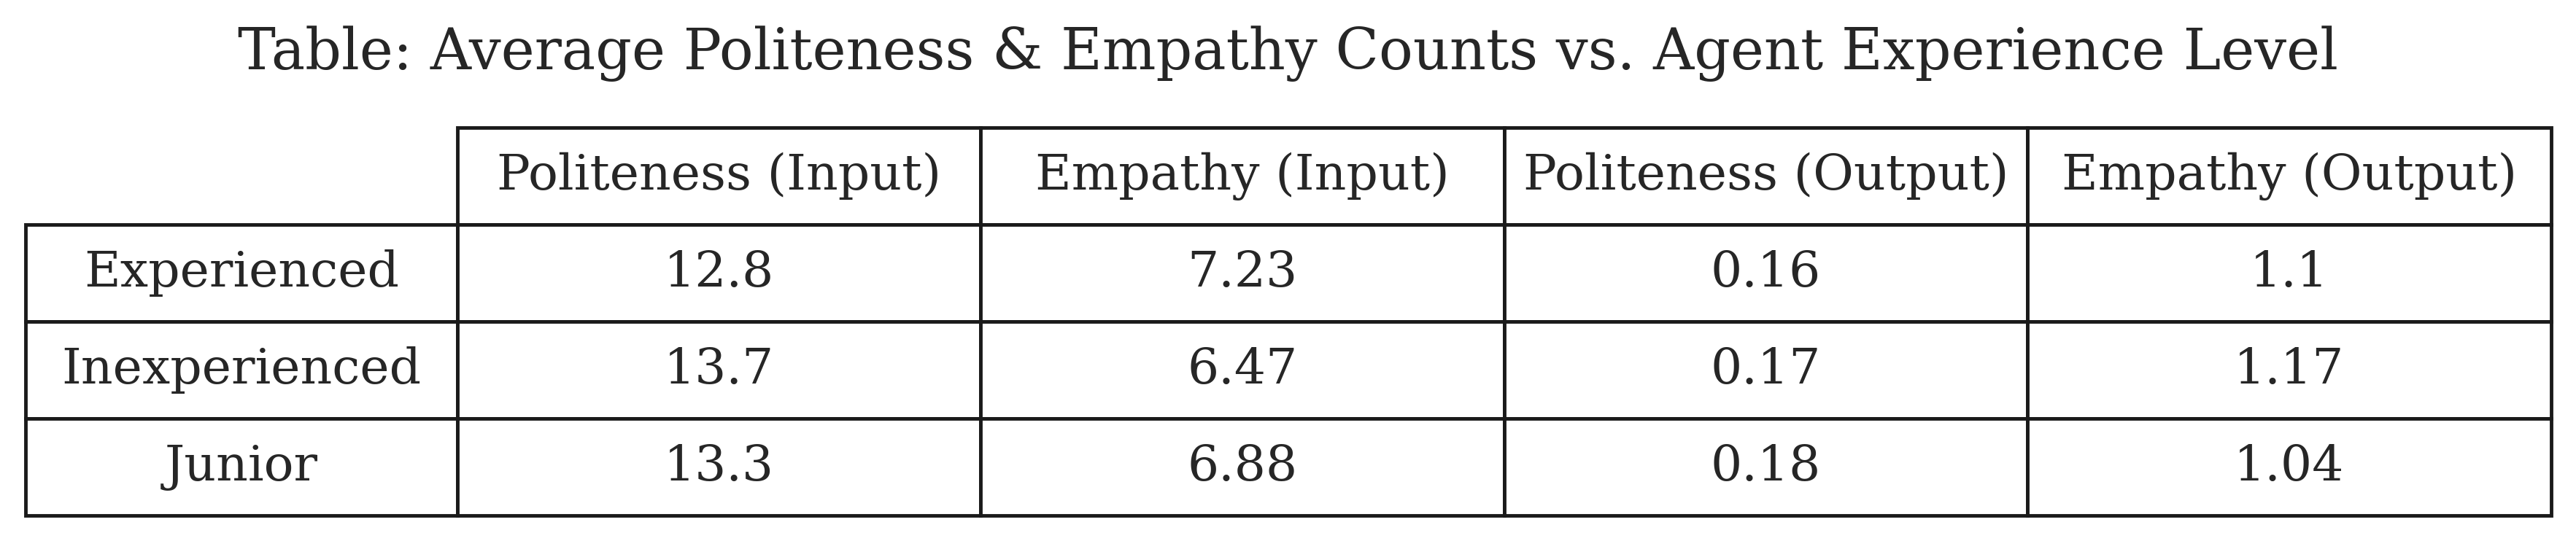

In [ ]:
politeness_empathy = customer_df.groupby('agent_experience_level')[['politeness_count_input', 'empathy_count_input', 'politeness_count_output', 'empathy_count_output']].mean()

capitalized_rows_politeness_empathy = [row.capitalize() for row in politeness_empathy.index]
capitalized_columns_politeness_empathy = ['Politeness (Input)', 'Empathy (Input)', 'Politeness (Output)', 'Empathy (Output)']

fig, ax = plt.subplots(figsize=(10.25, 2), dpi = 350)
fig.suptitle('Table: Average Politeness & Empathy Counts vs. Agent Experience Level', fontsize=16, y=1.05, ha='center')
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=politeness_empathy.values.round(2),
                 rowLabels=capitalized_rows_politeness_empathy,
                 colLabels=capitalized_columns_politeness_empathy,
                 cellLoc='center',
                 rowLoc='center',
                 bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(14)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


In [ ]:
match_ratios = customer_df.groupby('issue_complexity')[['keyword_match_ratio_1_10']].mean()
capitalized_rows_match_ratios = [row.capitalize() for row in match_ratios.index]
capitalized_columns_match_ratios = ['Issue Complexity', 'Keyword Match Ratio (1-10)']

table_data = [[row] + [f"{value:.2f}"] for row, value in zip(capitalized_rows_match_ratios, match_ratios.values.flatten())]

fig, ax = plt.subplots(figsize=(6.5, 1.7), dpi = 350)
fig.suptitle('Table: Keyword Match Ratio vs. Issue Complexity', fontsize = 16, y = 1.05, ha = 'center')
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText = table_data,
                 colLabels=capitalized_columns_match_ratios,
                 cellLoc = 'center',
                 rowLoc = 'center',
                 bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(14)

plt.tight_layout()
plt.subplots_adjust(top = 0.85)
plt.show()

In [ ]:
sentiment_by_issue_category = customer_df.groupby('issue_category')[['cleaned_input_sentiment_1_10']].mean()

capitalized_rows_sentiment_issue_category = [row.capitalize() for row in sentiment_by_issue_category.index]
capitalized_columns_sentiment_issue_category = ['Cleaned Input Sentiment (1-10)']

fig, ax = plt.subplots(figsize=(13.5,19), dpi = 350)
fig.suptitle('Table: Sentiment Scores vs. Issue Category', fontsize=16, y=1.05, ha='center')
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=sentiment_by_issue_category.values.round(2),
                 rowLabels=capitalized_rows_sentiment_issue_category,
                 colLabels=capitalized_columns_sentiment_issue_category,
                 cellLoc='center',
                 rowLoc='center',
                 bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(14)

plt.tight_layout()
plt.subplots_adjust(top=1.015)
plt.show()


In [ ]:
verified_sentiment = pd.crosstab(amazon_df['text_vader_csat_classification'], amazon_df['verified_purchase'])

capitalized_rows_verified_sentiment = [row.capitalize() for row in verified_sentiment.index]
capitalized_columns_verified_sentiment = ['Non-Verified', 'Verified']

fig, ax = plt.subplots(figsize=(6.35, 2.25), dpi = 350)
fig.suptitle('Table: Verified Purchase Distribution vs. Sentiment Classification', fontsize=16, y=1.05, ha='center')
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=verified_sentiment.values,
                 rowLabels=capitalized_rows_verified_sentiment,
                 colLabels=capitalized_columns_verified_sentiment,
                 cellLoc='center',
                 rowLoc='center',
                 bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(14)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


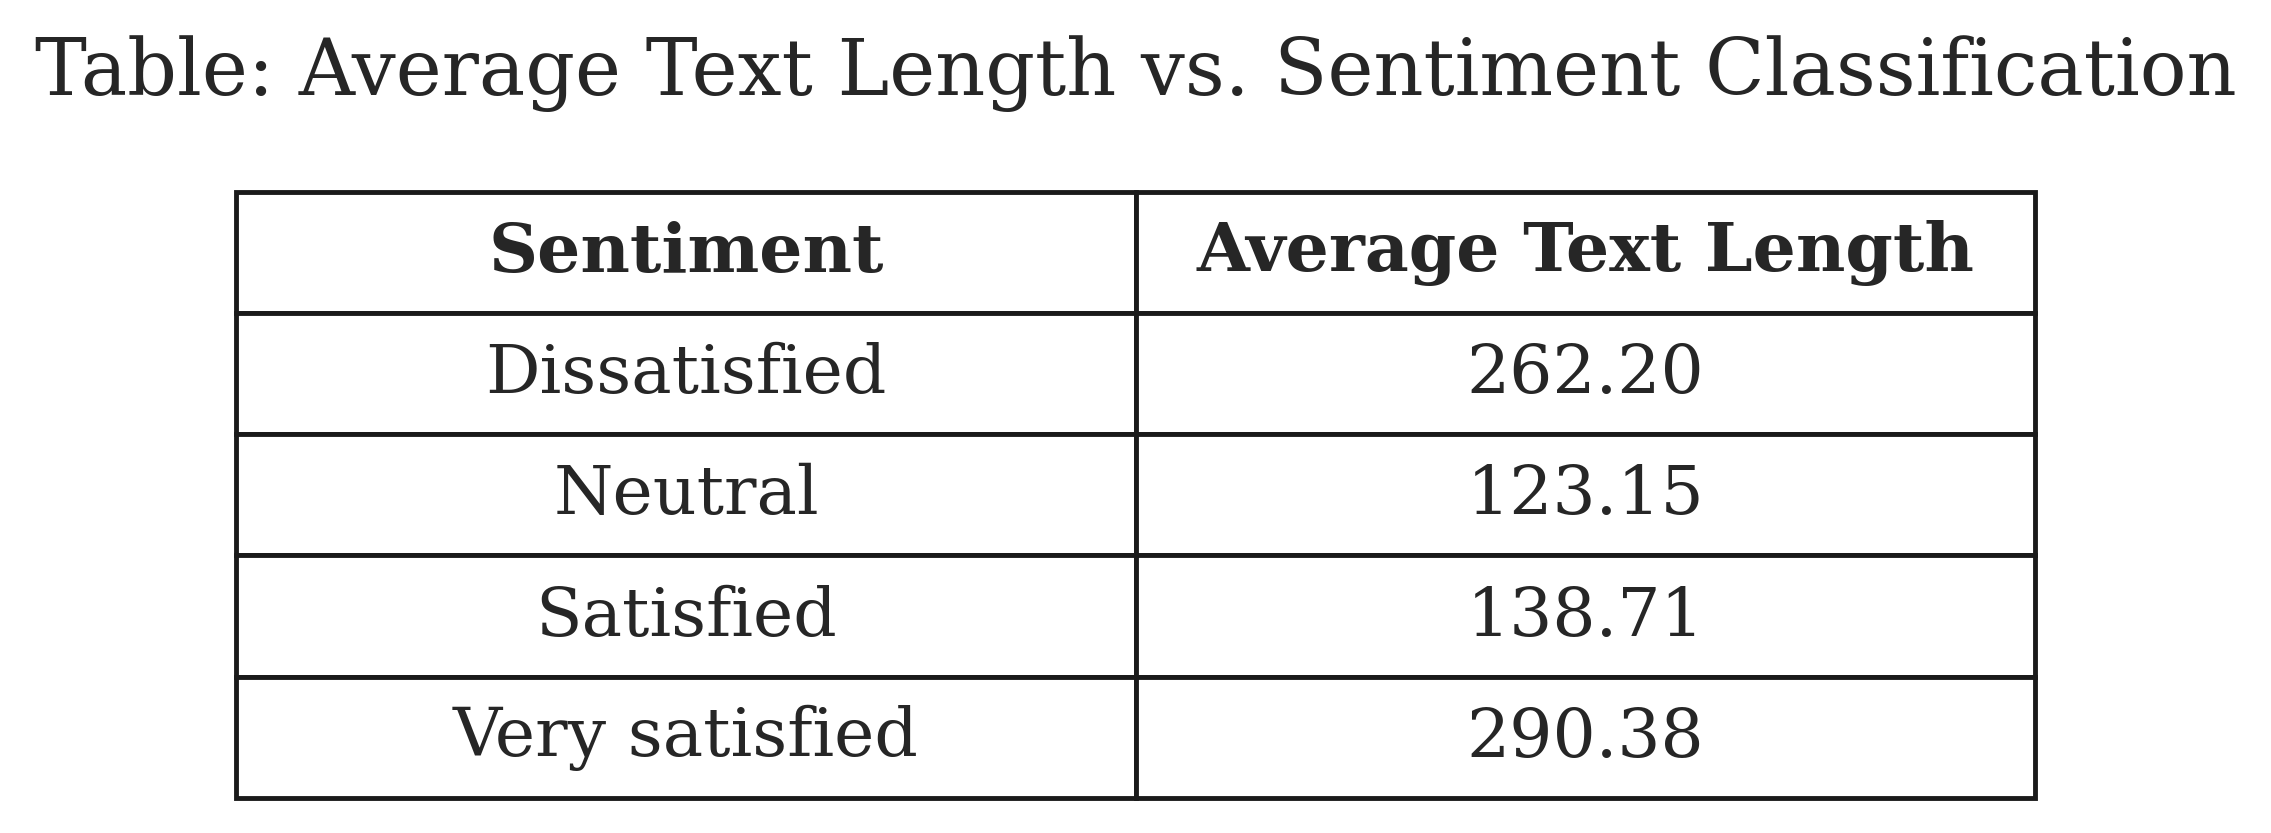

In [ ]:
amazon_df['text_length'] = amazon_df['text'].apply(len)

average_text_length_by_sentiment = amazon_df.groupby('text_vader_csat_classification')['text_length'].mean()

capitalized_rows = [row.capitalize() for row in average_text_length_by_sentiment.index]
average_text_lengths = average_text_length_by_sentiment.values

fig, ax = plt.subplots(figsize = (5.5,2.25), dpi = 350)

fig.suptitle('Table: Average Text Length vs. Sentiment Classification', fontsize = 16, y = 1.05, ha = 'center')
ax.axis('off')
ax.axis('tight')

table_data = [[row] + [f'{value:.2f}'] for row, value in zip(capitalized_rows, average_text_lengths)]

column_labels = ['Sentiment', 'Average Text Length']

col_widths = [0.1, 0.1]

table = ax.table(cellText = table_data,
                 colLabels = column_labels,
                 cellLoc = 'center',
                 rowLoc = 'center',
                 colWidths = col_widths,
                 bbox = [0, 0, 1, 1]
                 )
table.auto_set_font_size(False)
table.set_fontsize(14)

for (i,j), cell in table.get_celld().items():
  if i == 0:
    cell.get_text().set_fontweight('bold')

plt.tight_layout()
plt.subplots_adjust(top = 0.85)
plt.show()